# Customer Attrition Analysis

### Problem

Verizonet, a telecommunications company based in California, has been operating for six years,
providing phone and internet services to customers across more than a thousand cities and zip
codes. Despite a highly skilled sales team successfully attracting new clients, the company faces a
significant challenge: a high customer attrition rate. At the end of the last quarter, only 43% of newly
acquired customers chose to continue their services, resulting in a decrease in the total customer
base.

## Goal

The objective of this exercise is to build a model to predict the customer who can depart, using
historical data Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
1. Highlight any trend in data, deep insight, novel steps that you take
2. Highlight next steps and improvements.
3. Apply classification machine learning algorithms and evaluate it

# Importing Libraries

In [335]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [336]:
churn_df = pd.read_csv("verizonet_data.csv")
churn_df.head() # printing the first 5 rows of dataset 

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


### shape of dataset

In [337]:
churn_df.shape

(7043, 43)

The dataset contains 7043 rows and 43 columns

## Exploratory Data Analysis (EDA)
Initial exploration of the dataset to understand its structure, size, and variable types.
Identify key patterns, trends, and potential outliers.
Utilize visualizations to gain insights into the distribution of various features.

In [338]:
#Displaying the information about the dataset 
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

The dataset contains categorical,integer and float values. These are the datatype in this dataset  

1. Customer ID-  customers id unique value 
2. Referred a Friend -  this column contains information about if the custeomer referd this company to a friend
3. Number of Referrals - it contains number of referel values 0,1,2
4. Tenure in Months - it gives no of months since joined
5. Offer - it contains the offer recieved a,b,c,d,e are the offers
6. Phone Service - it gives information about the customer have phone service or not yes /no values
7. Avg Monthly Long Distance Charges - in ts gives the avg monthly  long distance charge
8. Multiple Lines -  it gives information about the customer have multiple line connection or not
9. Internet Service - in gives information about the customer has internet service yes/no
10. Internet Type  - fiber optic/cable/DSL
11. Avg Monthly GB Download - avg gb downloaded per month
12. Online Security -  yes/no
13. Online Backup -yes /no
14. Device Protection Plan -yes/no
15. Premium Tech Support -yes/no
16. Streaming TV -yes /no
17. Streaming Movies -yes /no
18. Streaming Music -yes/no
19. Unlimited Data - yes/no
20. Contract -  Month-to-Month,One Year ,Two Year    
21. Paperless Billing - yes/no
22. Payment Method - Bank Withdrawal ,Credit Card,Mailed Check
23. Monthly Charge - montly chargers
24. Total Regular Charges - Total Regular Charges of c
25. Total Refunds - Total Refunds recived
26. Total Extra Data Charges - Total Extra Data Charges
27. Total Long Distance Charges -Total Long Distance Charges
28. Gender - male/female
29. Age
30. Under 30 - yes /no
31. Senior Citizen -yes/no
32. Married - yes/no
33. Dependents - yes/no
34. City -  city
35. Zip Code - zip codes
36. Population -Population
37. Churn Status - 0- for not churn and 1 -for churn 
38. CLTV -Customer Lifetime Value
39. Churn Category - Competitor,Attitude,Dissatisfaction,Other,Price
40. Churn Reason - Reason for depart 
41. Total Customer Svc Requests  - how many svc requests recived 
42. Product/Service Issues Reported -how many product/service issue reported
43. Customer Satisfaction rate - customer satisfaction rate 

In [339]:
# Displaying the statistical details in the dataset 
churn_df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


We can get the count ,mean ,standered deviation minimum value ,25%-50%-75% percentile, maximum value in each numerical column

In [340]:
#printing the column names in the dataset
churn_df.columns

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Zip Code',
       'Population', 'Churn Status', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')

In [341]:
#Checking the missing values in the dataset 
churn_df.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

This shows that there are missing values in the dataset, 3877 missing value by Offer and 1526 by Internet Type , 5174 Churn Category 5174 Churn Reason and 5209 Customer Satisfaction rate

<Axes: >

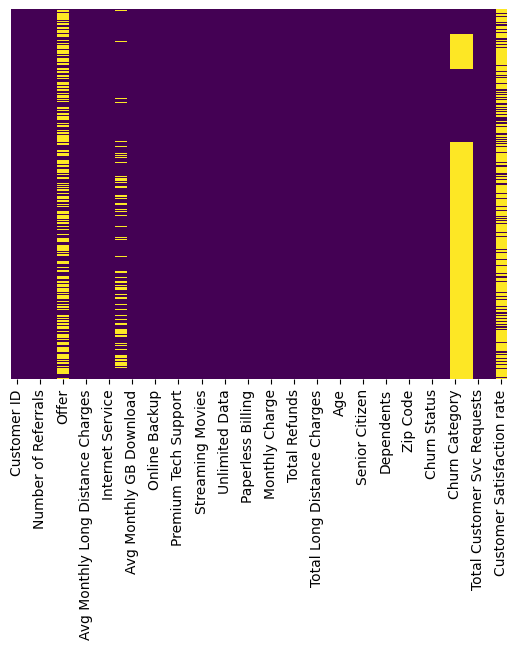

In [342]:
# displaying the heatmap for missing values in the dataset
sns.heatmap(churn_df.isnull(),yticklabels = False,cbar =False ,cmap ='viridis')

In [343]:
print(churn_df[ 'Churn Category'].mode()[0])
print(churn_df['Churn Reason'].mode()[0])
print(churn_df['Internet Type'].mode()[0])
print(churn_df['Offer'].mode()[0])

Competitor
Competitor had better devices
Fiber Optic
Offer B


These are the mode values of each categorical column.These are used to fill the missing values in that column 

In [344]:
churn_df['Customer Satisfaction rate'].mean()

3.005452562704471

This is mean value of column Customer Satisfaction rate .mean is used heare beacuse its a numerical column,this value is used to fill the missing value in that column .

In [345]:
# filing the missing value using fillna meathod 
churn_df['Customer Satisfaction rate'].fillna(churn_df['Customer Satisfaction rate'].mean(), inplace=True)

churn_df['Churn Category'].fillna(churn_df[ 'Churn Category'].mode()[0], inplace=True)
churn_df['Churn Reason'].fillna(churn_df['Churn Reason'].mode()[0], inplace=True)
churn_df['Internet Type'].fillna(churn_df['Internet Type'].mode()[0], inplace=True)
churn_df['Offer'].fillna(churn_df['Offer'].mode()[0], inplace=True)

<Axes: >

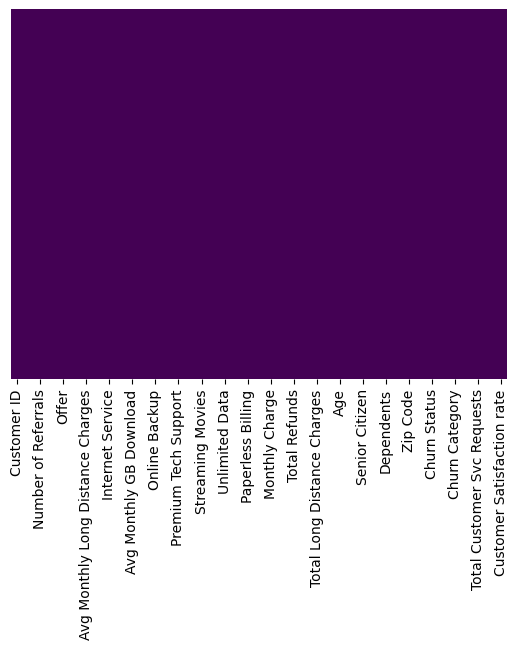

In [346]:
# Displaying heatmap after filling the missing value 
sns.heatmap(churn_df.isnull(),yticklabels = False,cbar =False ,cmap ='viridis')

After filling missing value and by cheking again if there is any missing value, We can conclude that there is no missing values in the dataset now

In [347]:
#cheking if there is any duplicate in the dataset
churn_df.duplicated().sum()


0

In [348]:
# droping customer ID column .
churn_df.drop('Customer ID',axis=1,inplace = True)

In [349]:
churn_df

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,No,0,1,Offer B,No,0.00,No,Yes,Fiber Optic,9,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,3.005453
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,3.005453
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,3.005453
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.000000
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,72,Offer B,Yes,22.77,No,No,Fiber Optic,0,...,Landers,92285,2182,0,5306,Competitor,Competitor had better devices,0,0,3.005453
7039,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,24,...,Adelanto,92301,18980,0,2140,Competitor,Competitor had better devices,2,0,3.005453
7040,Yes,4,72,Offer B,Yes,29.66,Yes,Yes,Cable,59,...,Amboy,92304,42,0,5560,Competitor,Competitor had better devices,2,0,4.000000
7041,Yes,1,11,Offer B,No,0.00,No,Yes,DSL,17,...,Angelus Oaks,92305,301,0,2793,Competitor,Competitor had better devices,0,0,3.005453


In [350]:
#selecting numerical and categorical columns into a list 
numerical_cols =churn_df.select_dtypes(include=['int64','float64']).columns.tolist()
print('numerical column :',numerical_cols)
cat_colums =churn_df.select_dtypes(include=np.object_).columns.tolist()
print('categorical columns ;',cat_colums)

numerical column : ['Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Age', 'Zip Code', 'Population', 'Churn Status', 'CLTV', 'Total Customer Svc Requests', 'Product/Service Issues Reported', 'Customer Satisfaction rate']
categorical columns ; ['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'City', 'Churn Category', 'Churn Reason']


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


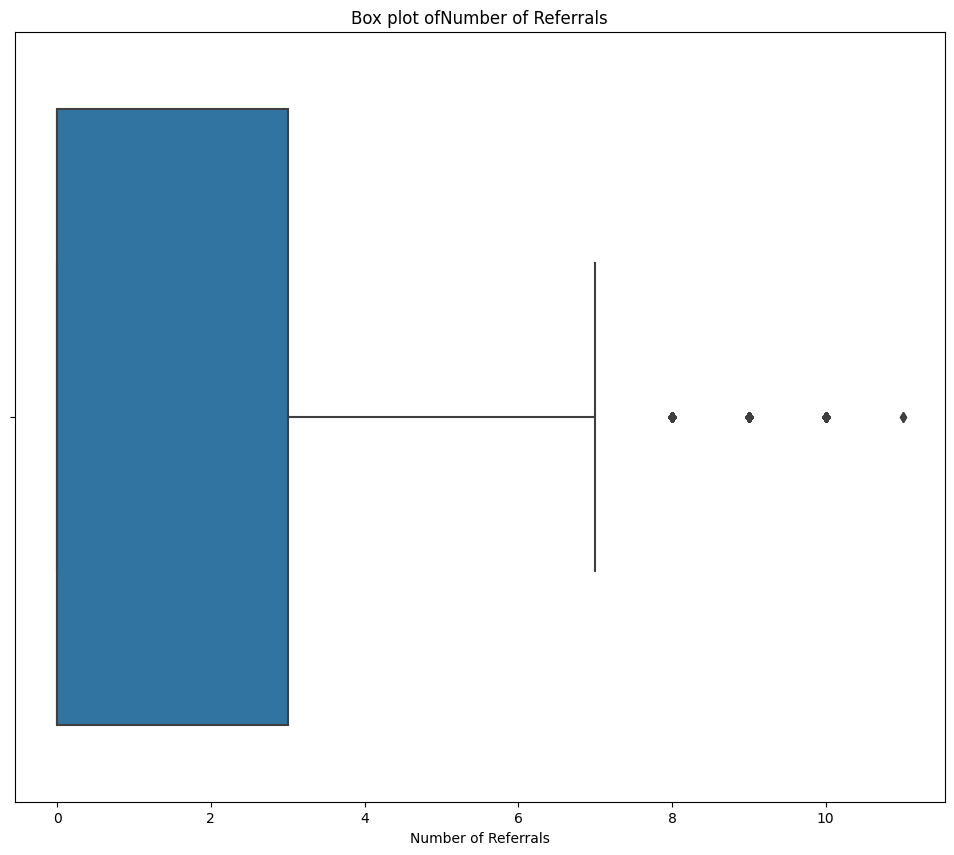

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


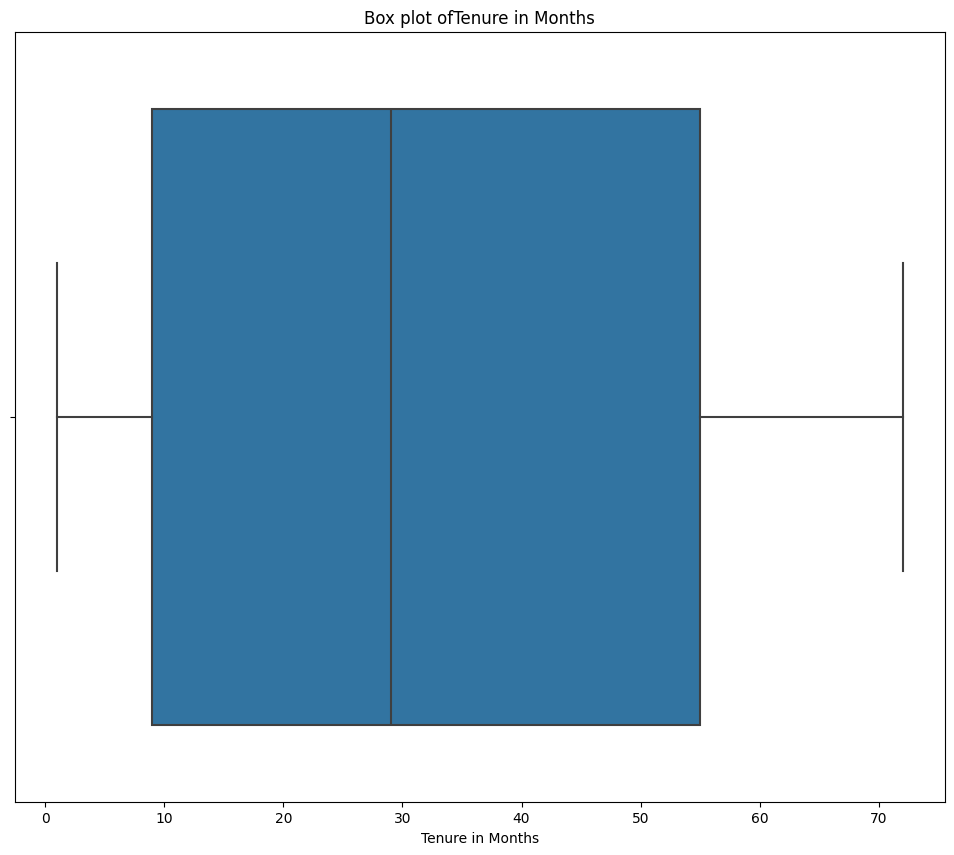

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


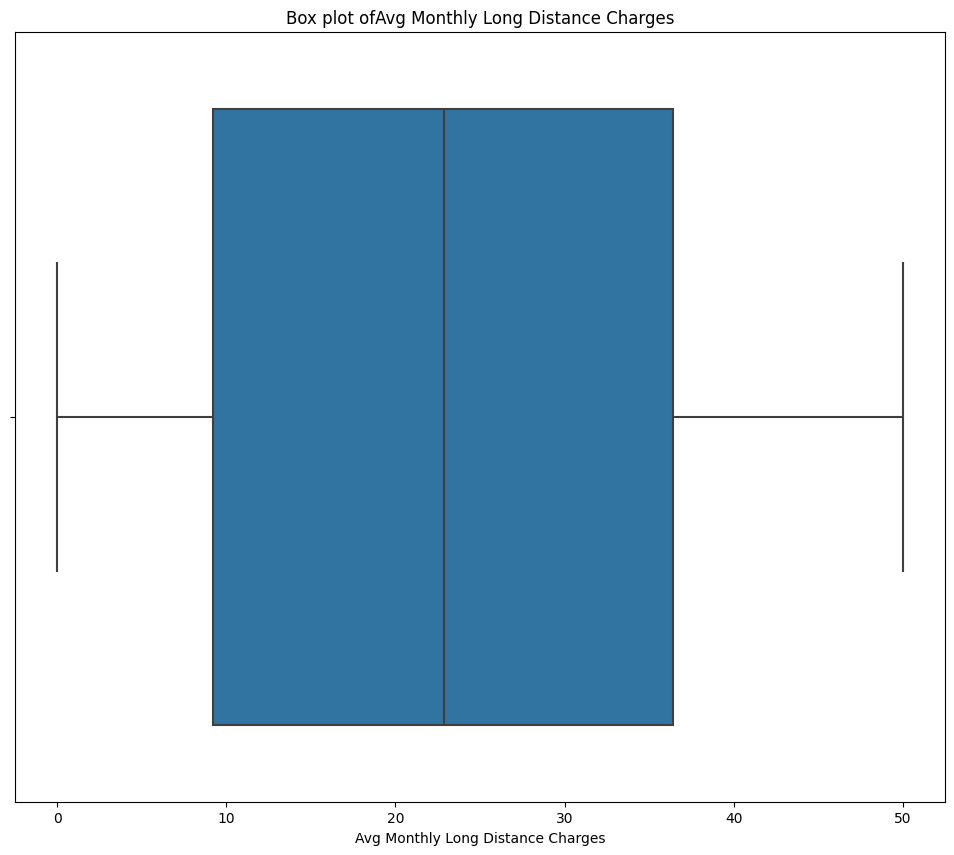

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


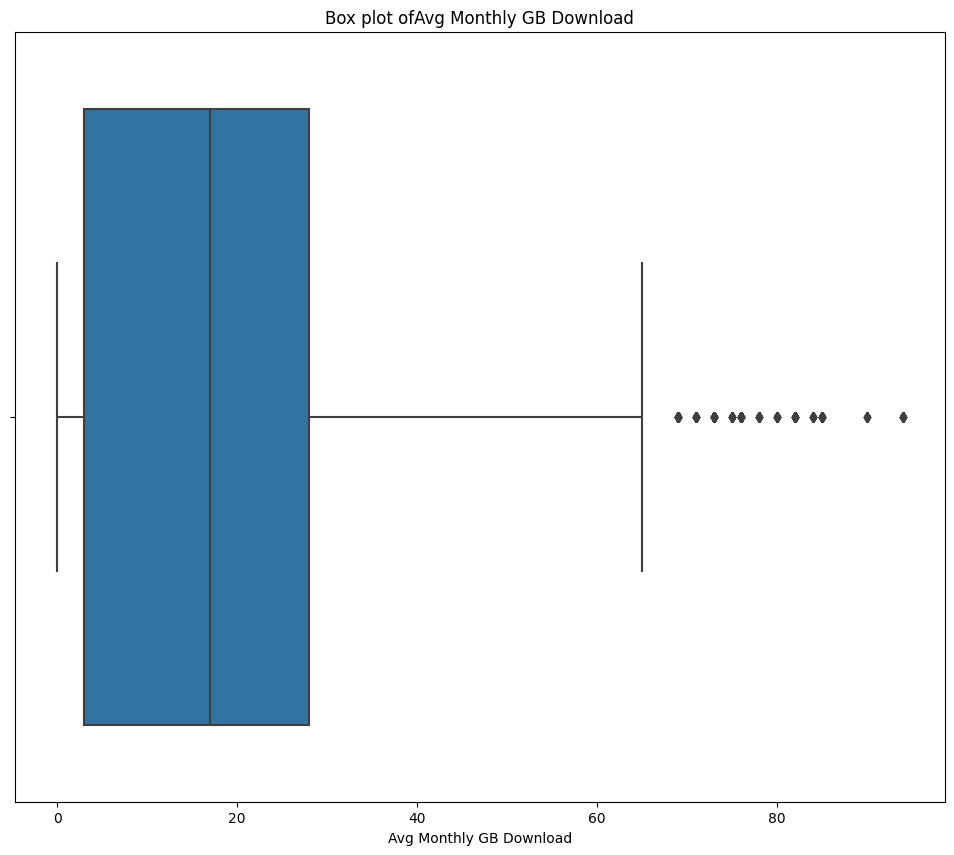

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


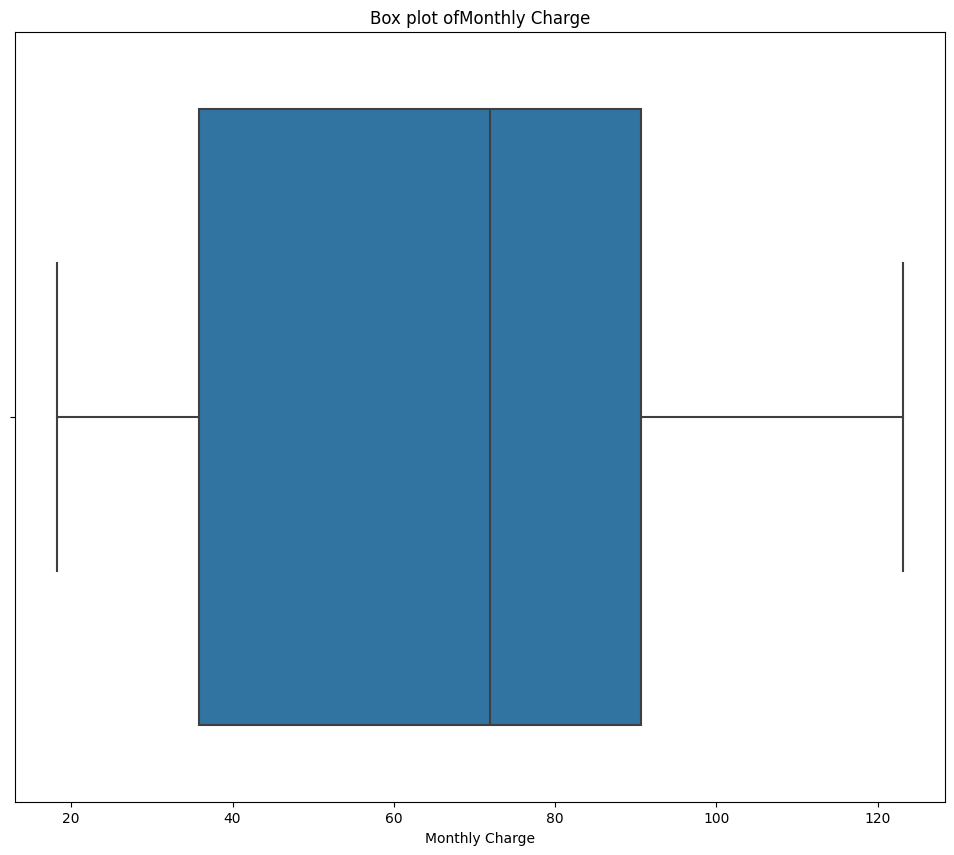

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


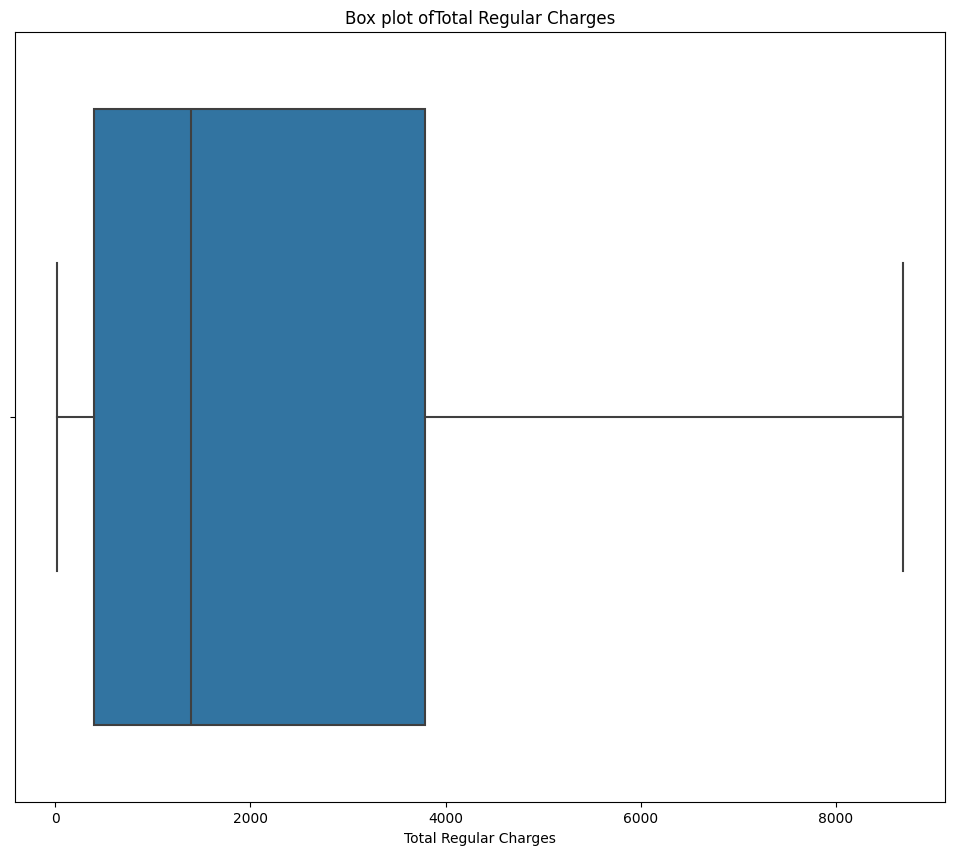

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


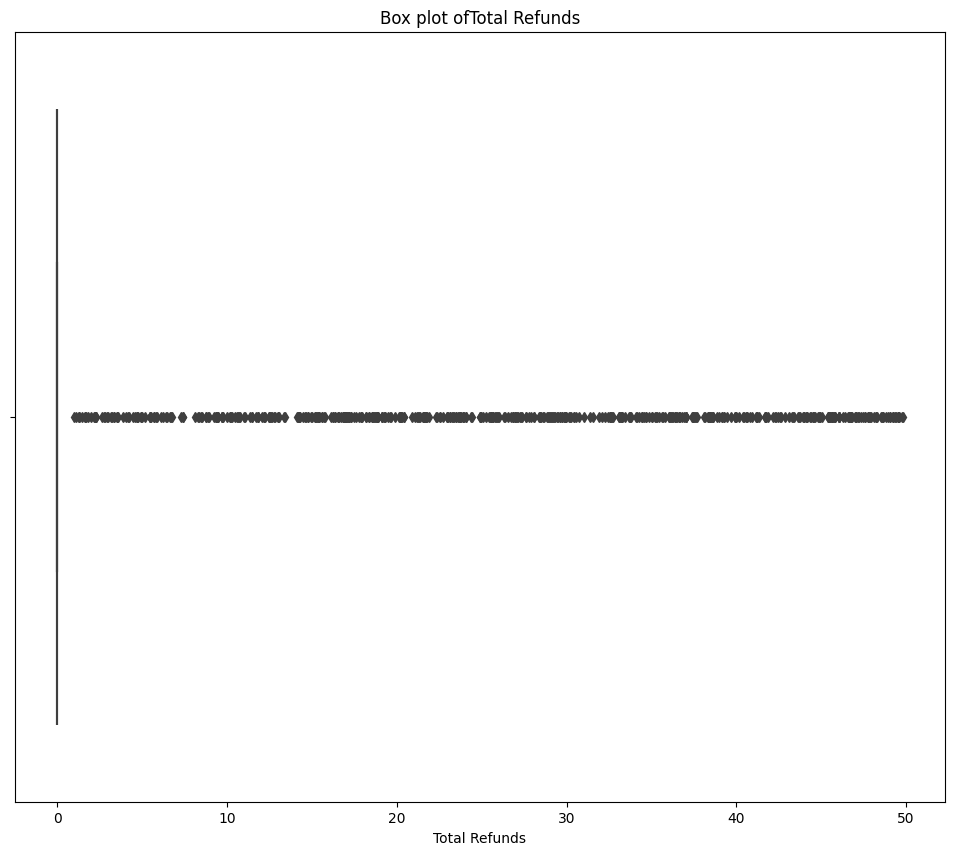

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


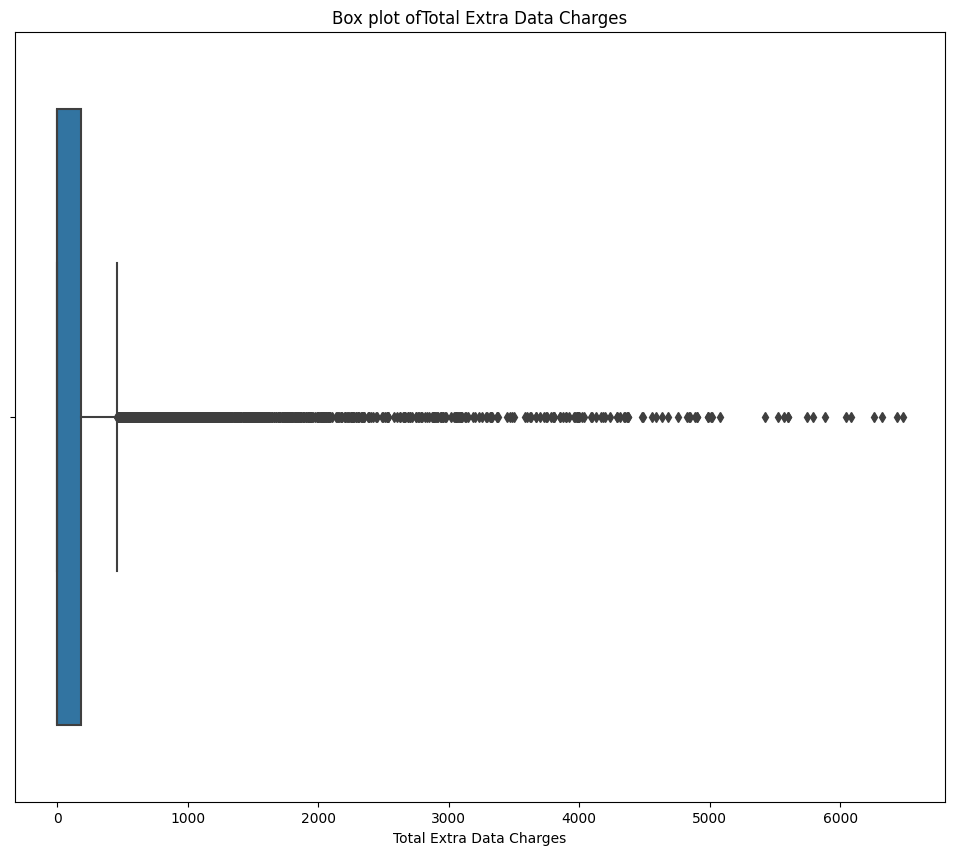

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


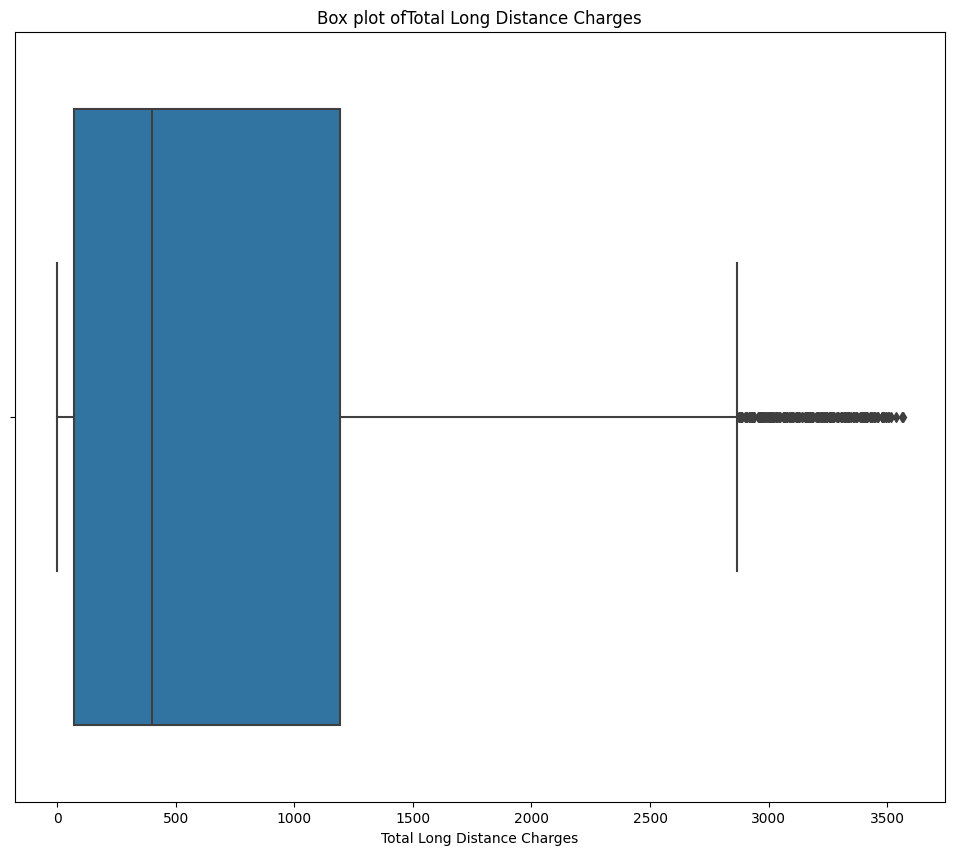

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


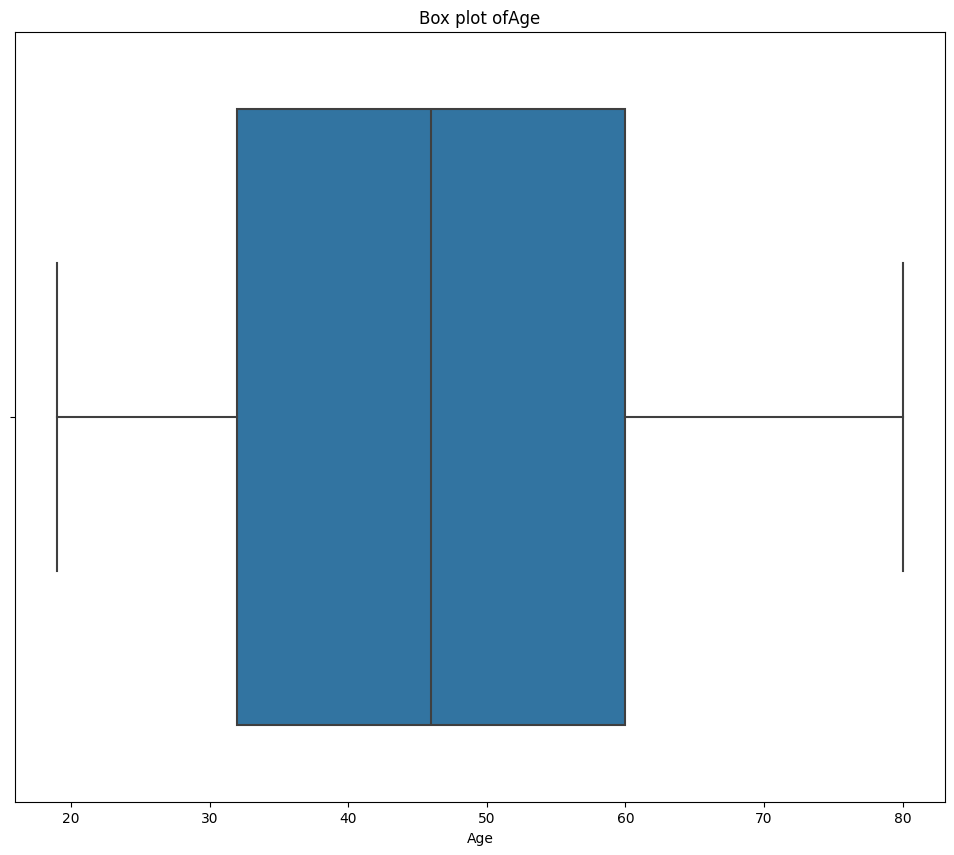

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


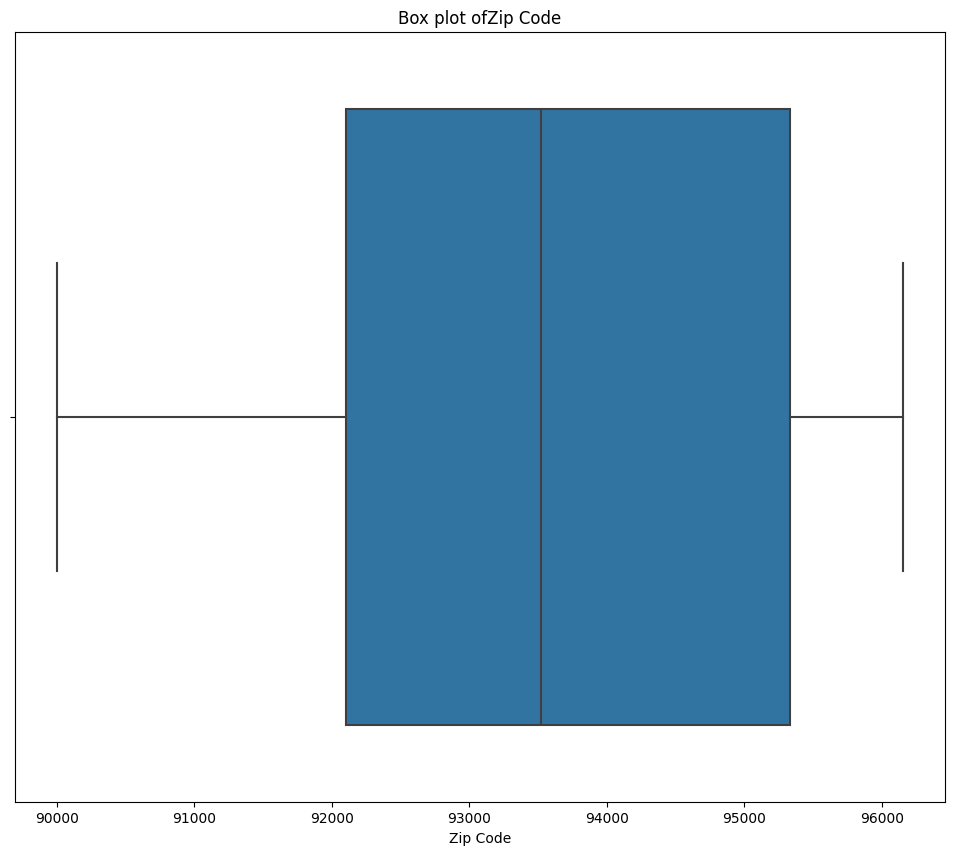

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


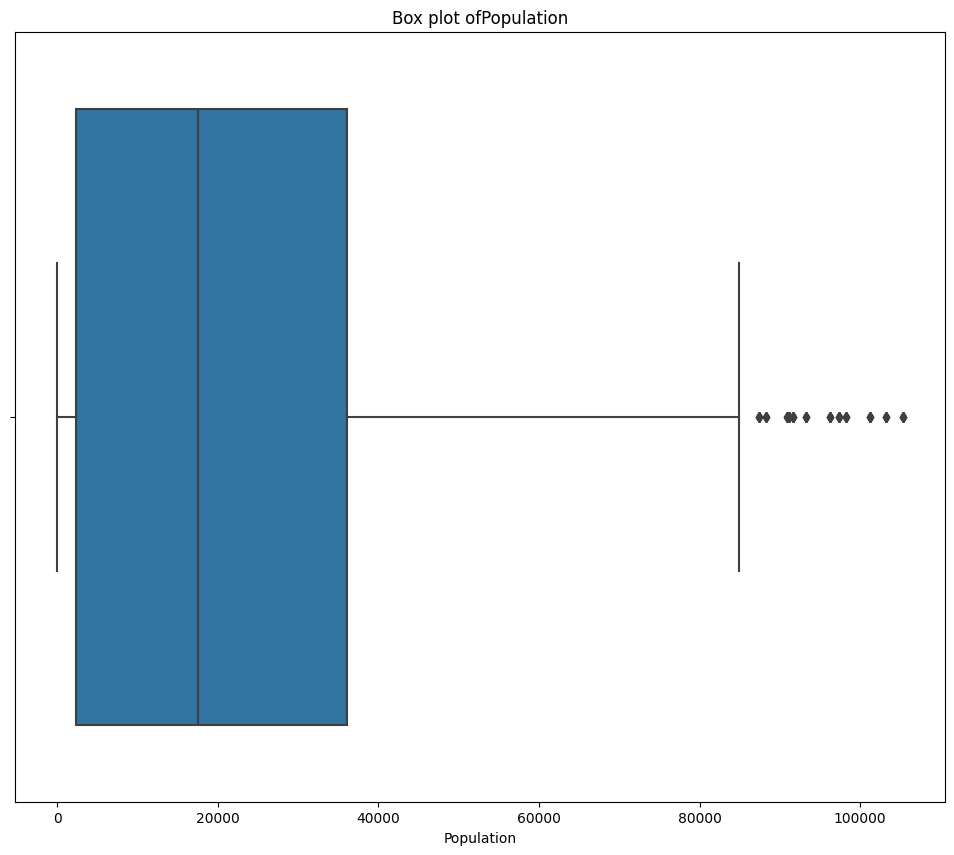

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


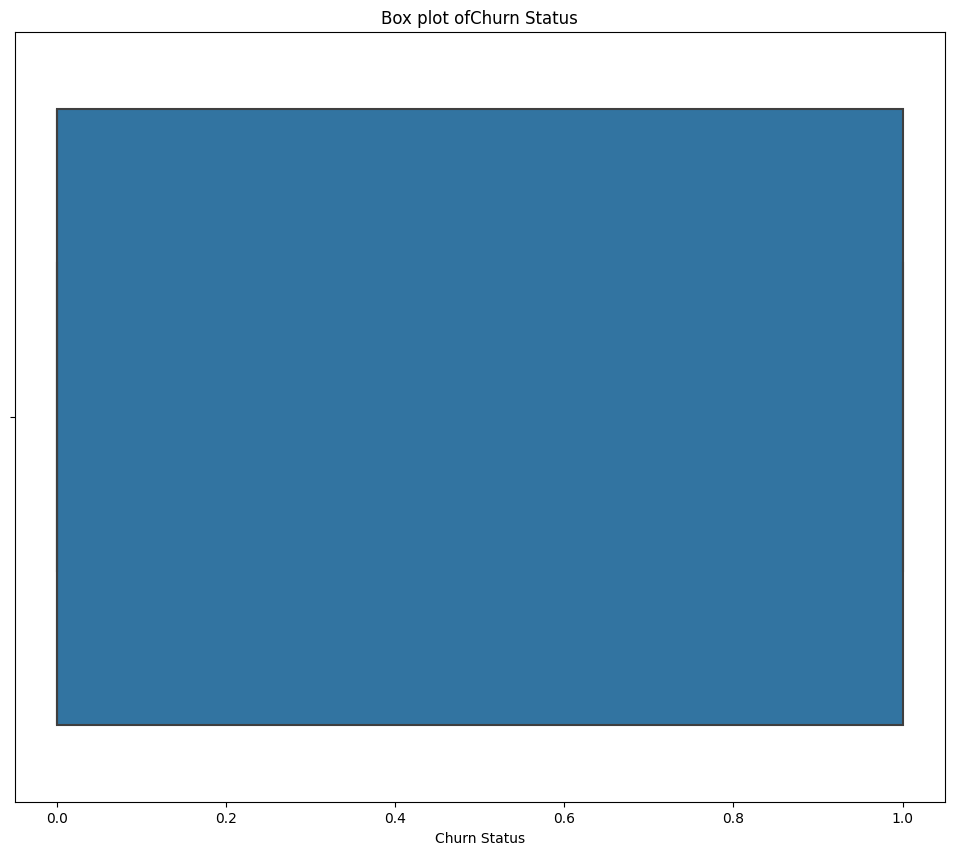

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


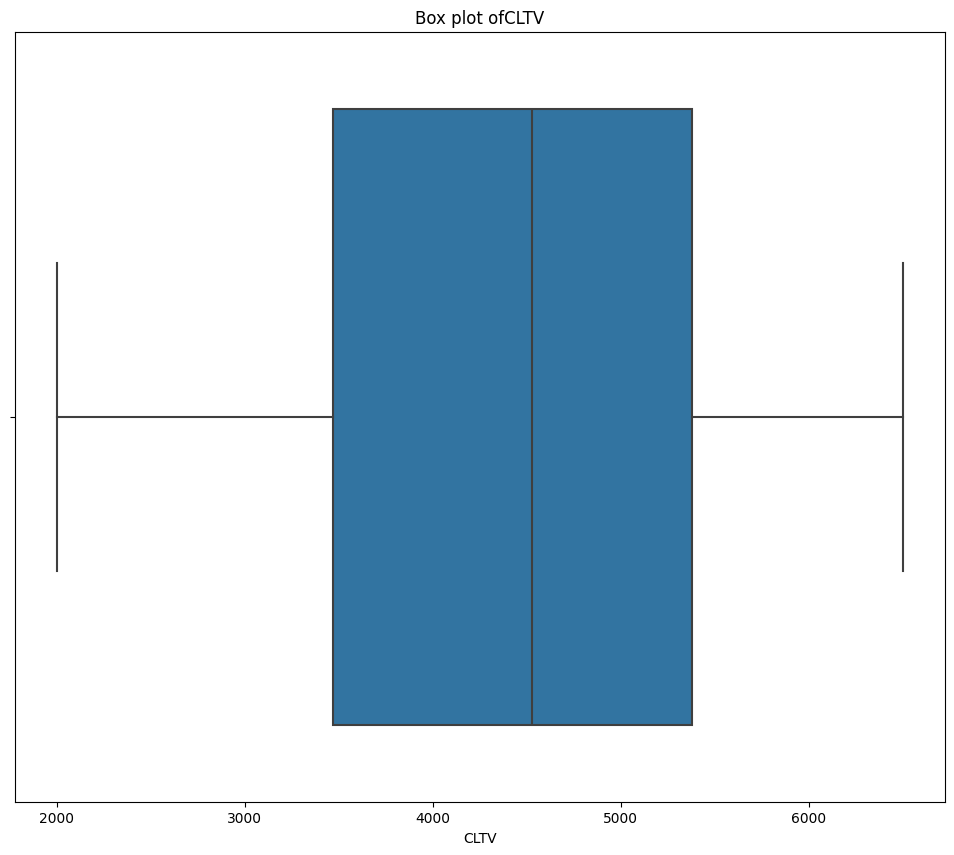

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


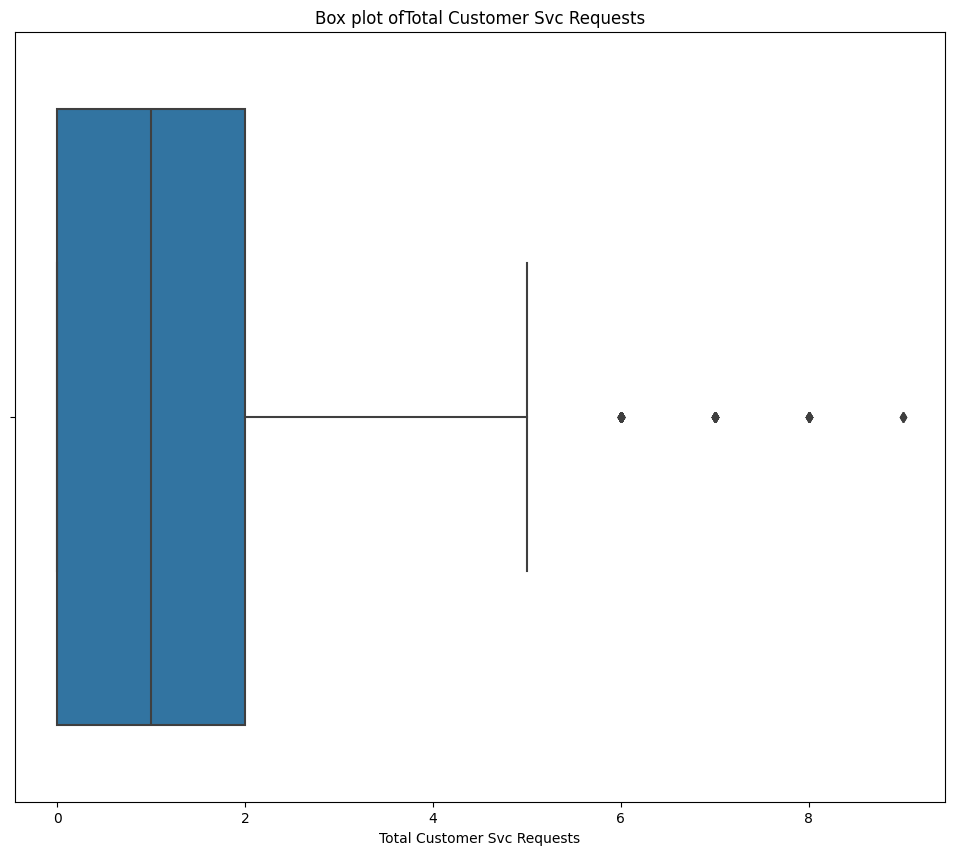

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


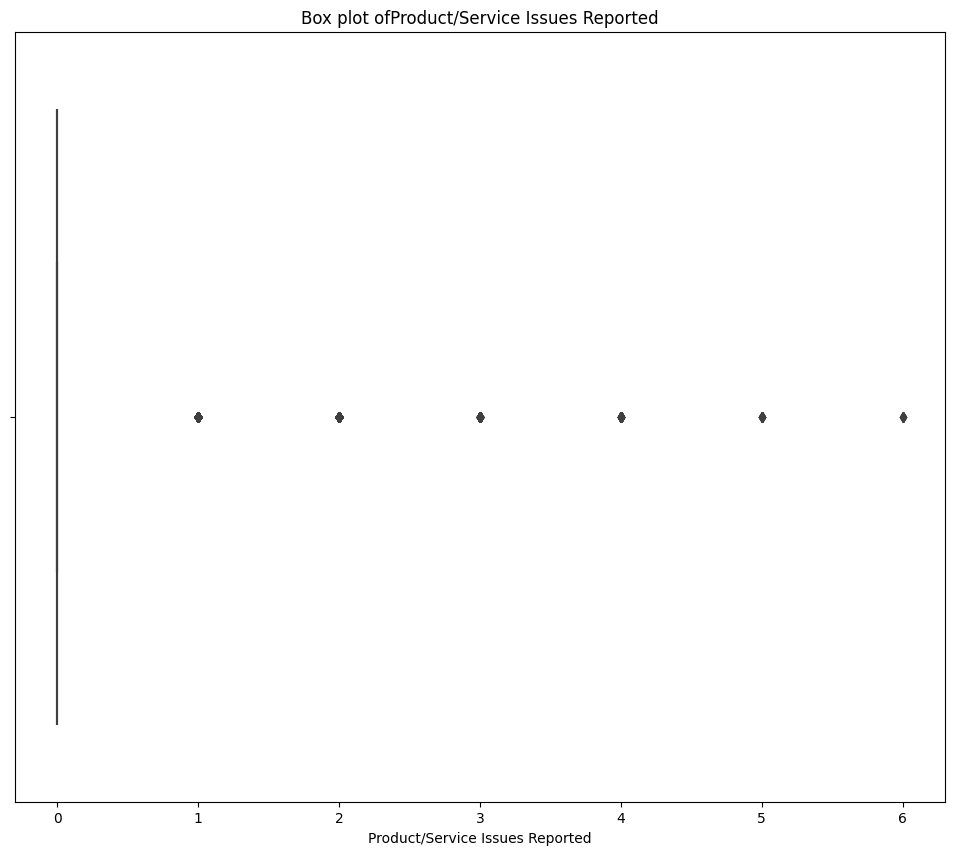

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


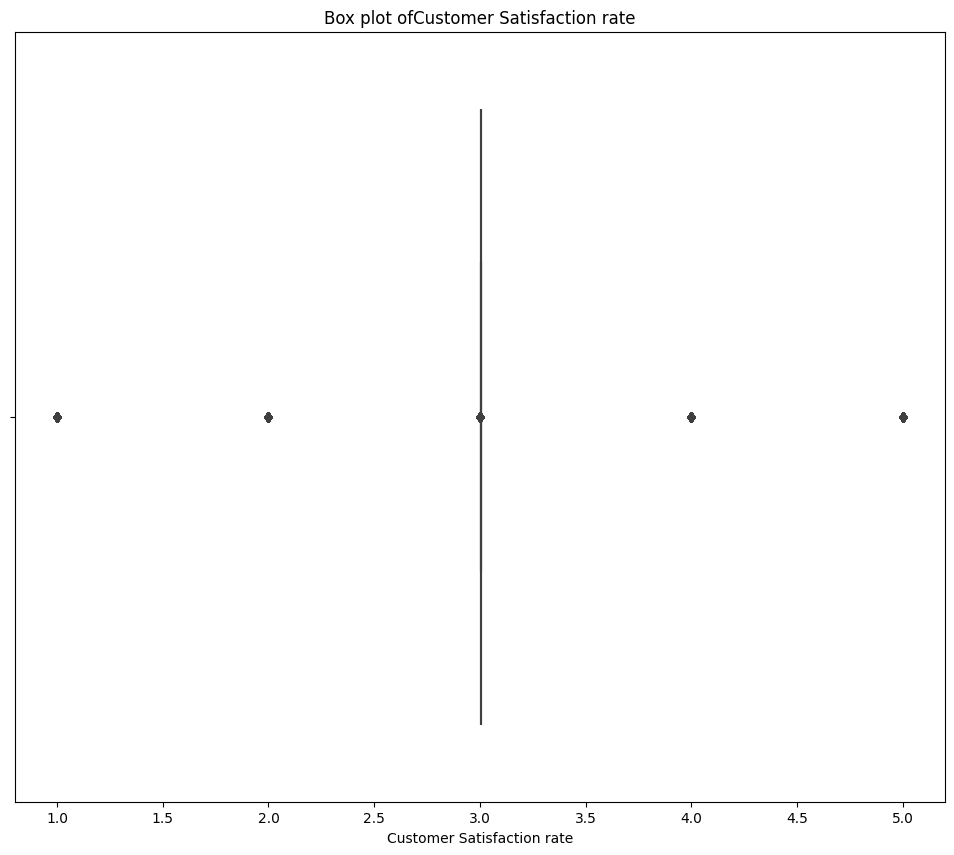

In [351]:
# cheking outliers in the numerical columns in the dataset by box plot method
for i in numerical_cols :
    plt.figure(figsize =(12,10))
    sns.boxplot(x=churn_df[i])
    plt.title('Box plot of{}'.format(i))
    plt.show()

There are some outliers in the dataset 


In [352]:
#cheking outlier in Avg Monthly Gb Downloaded by zscore and removing outliers 
from scipy.stats import zscore
z_scores = zscore(churn_df['Avg Monthly GB Download'])
abs_z_scores = np.abs(z_scores)
threshold_z = 1
outlier = np.where(abs_z_scores > threshold_z)[0]
no_outliers = churn_df.drop(outlier, inplace =True)
churn_df.shape

(4396, 42)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


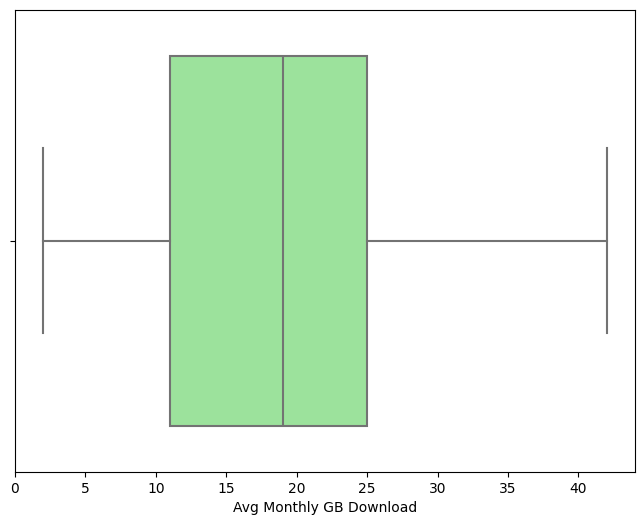

In [353]:
# Check the boxplot of 'Avg Monthly GB Download'  if there is any outliers still in there 
plt.figure(figsize=(8, 6))
sns.boxplot(x=churn_df['Avg Monthly GB Download'], color='lightgreen')
plt.show()

The outlier in Avg Monthly GB Download is removed

In [354]:
#Check the boxplot of 'Number of Referrals' after removing outliers
# Calculate the IQR for 'Number of Referrals'
Q1 =  churn_df['Number of Referrals'].quantile(0.25)
Q3 =  churn_df['Number of Referrals'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper limits for 'Number of Referrals'
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower)
print(upper)

# Find the rows where 'Number of Referrals' is outside the IQR
outliers = churn_df[( churn_df['Number of Referrals'] > 2.5) | ( churn_df['Number of Referrals'] < lower)]

# Print the number of outliers
print(outliers.shape)
# Print the number of outliers
print("Number of Outliers:", outliers.shape[0])
# Remove the identified outliers from the DataFrame
churn_df =  churn_df.drop(outliers.index)
print("Shape of cleaned DataFrame:",  churn_df.shape)

-3.0
5.0
(1072, 42)
Number of Outliers: 1072
Shape of cleaned DataFrame: (3324, 42)


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


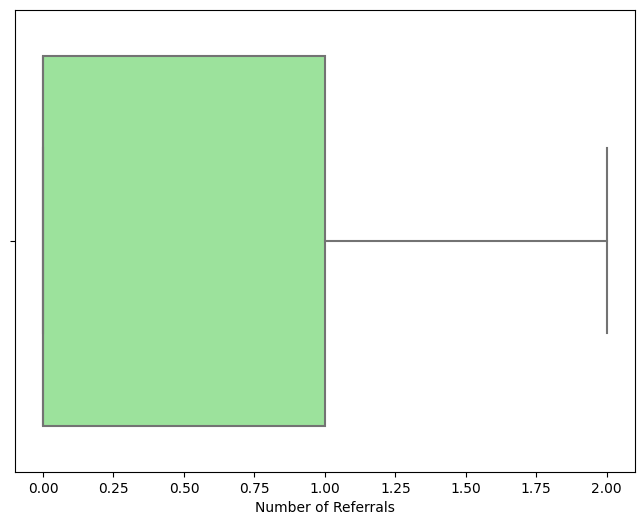

In [355]:
#displaying box plot of 'Number of Referrals'
plt.figure(figsize=(8, 6))
sns.boxplot(x=churn_df['Number of Referrals'], color='lightgreen')
plt.show()

The outlier in Number of Referrals column is removed 

In [356]:
#Check the boxplot of 'Total Regular Charges' after removing outliers
# Calculate the IQR for 'Total Regular Charges'
Q1 = churn_df['Total Regular Charges'].quantile(0.25)
Q3 = churn_df['Total Regular Charges'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper limits for 'Total Regular Charges'
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower)
print(upper)

# Find the rows where 'Total Regular Charges' is outside the IQR
outliers = churn_df[(churn_df['Total Regular Charges'] > upper) | (churn_df['Total Regular Charges'] < lower)]

# Print the number of outliers
print(outliers.shape)
# Print the number of outliers
print("Number of Outliers:", outliers.shape[0])
# Remove the identified outliers from the DataFrame
churn_df = churn_df.drop(outliers.index)
print("Shape of cleaned DataFrame:", churn_df.shape)

-4556.5125
8669.2875
(1, 42)
Number of Outliers: 1
Shape of cleaned DataFrame: (3323, 42)


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


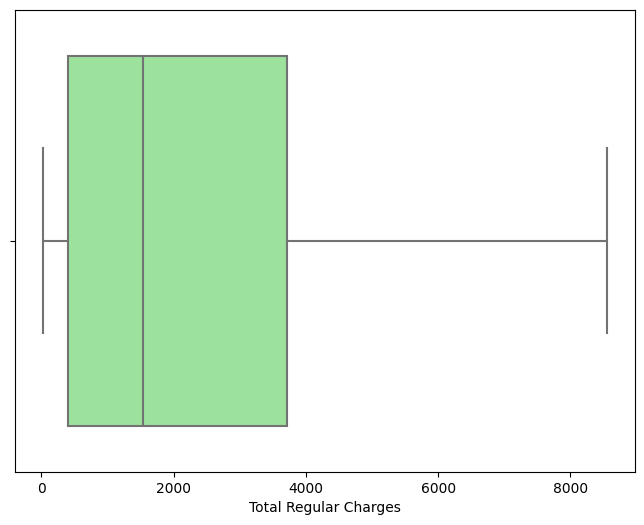

In [357]:
#displatying box plotof 'Total Regular Charges'
plt.figure(figsize=(8, 6))
sns.boxplot(x=churn_df['Total Regular Charges'], color='lightgreen')
plt.show()

In [358]:
#Check the boxplot of 'Total Customer Svc Requests' after removing outliers
# Calculate the IQR for 'Total Customer Svc Requests'
Q1 = churn_df['Total Customer Svc Requests'].quantile(0.25)
Q3 = churn_df['Total Customer Svc Requests'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper limits for 'Total Customer Svc Requests'
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


print(lower)
print(upper)

# Find the rows where 'Total Customer Svc Requests' is outside the IQR
outliers = churn_df[(churn_df['Total Customer Svc Requests'] > upper) | (churn_df['Total Customer Svc Requests'] < lower)]

# Print the number of outliers
print(outliers.shape)
# Print the number of outliers
print("Number of Outliers:", outliers.shape[0])
# Remove the identified outliers from the DataFrame
churn_df = churn_df.drop(outliers.index)
print("Shape of cleaned DataFrame:", churn_df.shape)

-3.0
5.0
(83, 42)
Number of Outliers: 83
Shape of cleaned DataFrame: (3240, 42)


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


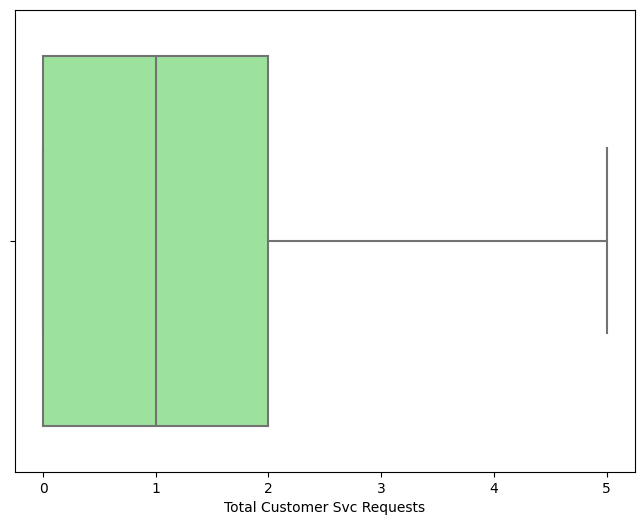

In [359]:
#displaying box plot for 'Total Customer Svc Requests'
plt.figure(figsize=(8, 6))
sns.boxplot(x=churn_df['Total Customer Svc Requests'], color='lightgreen')
plt.show()

In [360]:
num_df=  churn_df.select_dtypes(include =['number'])
print(num_df)

      Number of Referrals  Tenure in Months  \
0                       0                 1   
1                       1                 8   
3                       1                25   
4                       1                37   
5                       0                27   
...                   ...               ...   
7036                    0                19   
7037                    0                12   
7039                    1                24   
7041                    1                11   
7042                    0                66   

      Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
0                                  0.00                        9   
1                                 48.85                       19   
3                                 19.76                       13   
4                                  6.33                       15   
5                                  3.33                       20   
...                        

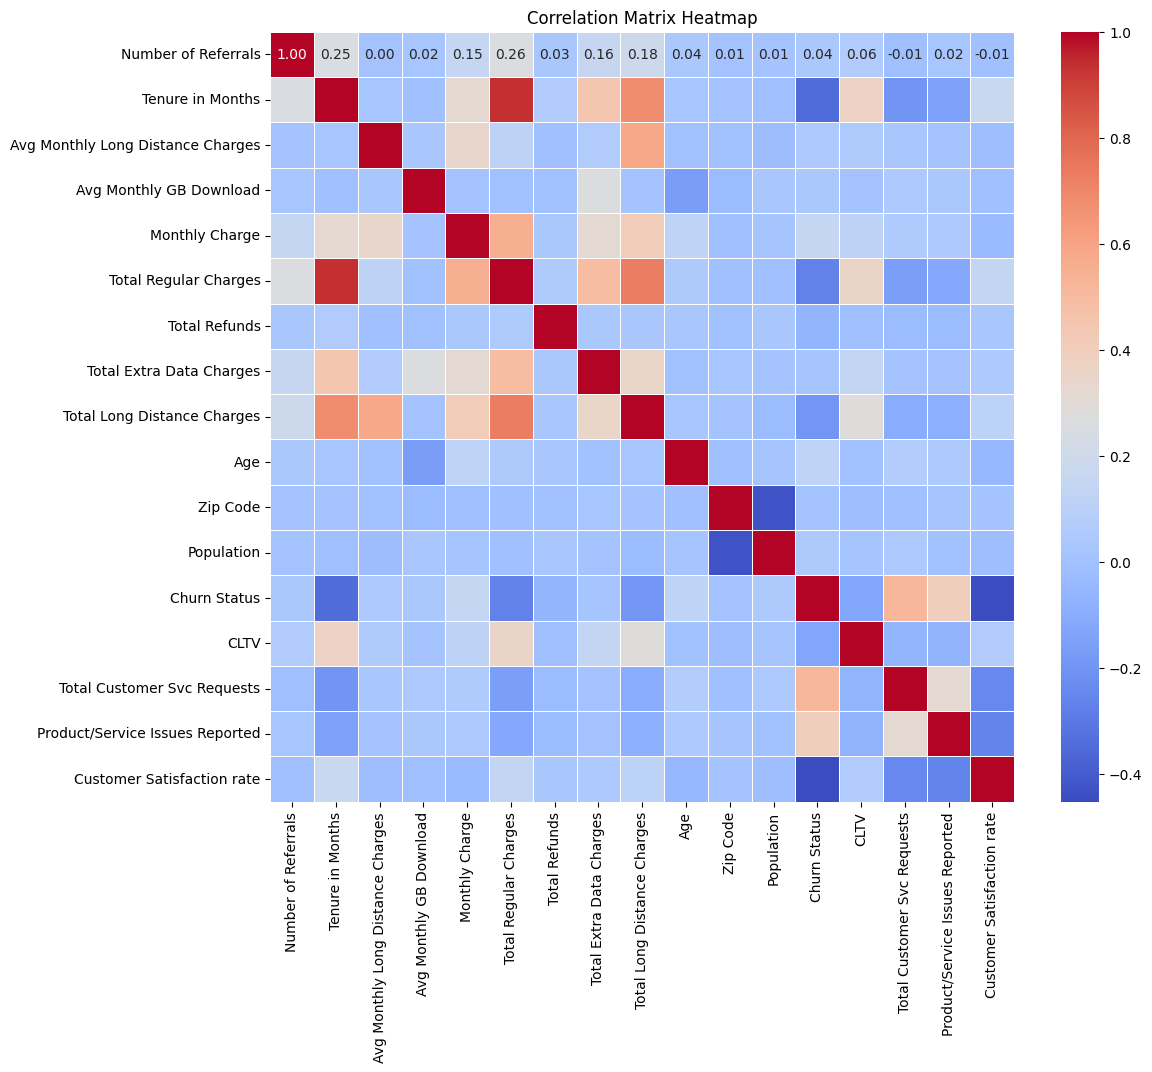

In [361]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [362]:
## Distribution plot for numeric columns

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


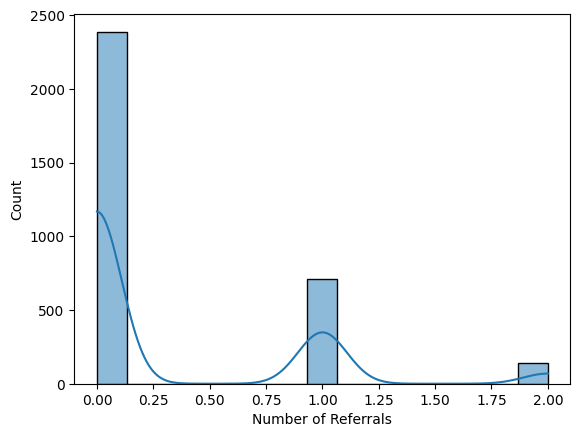

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


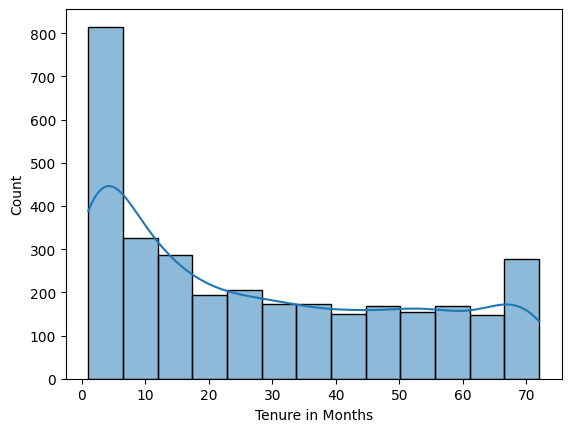

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


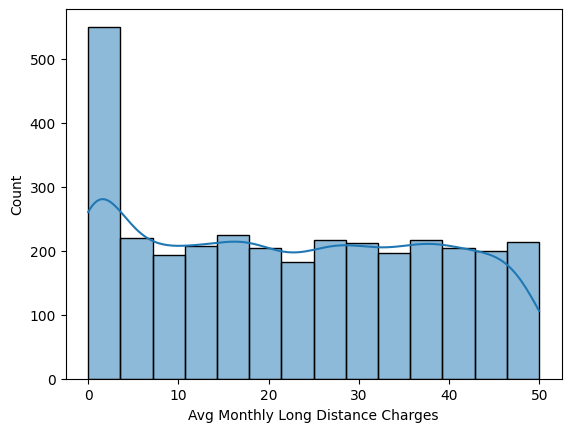

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


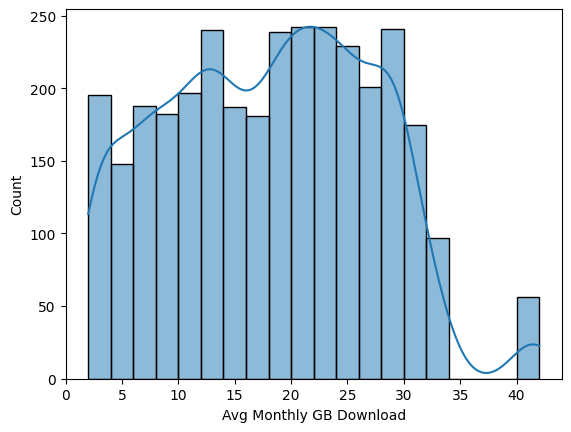

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


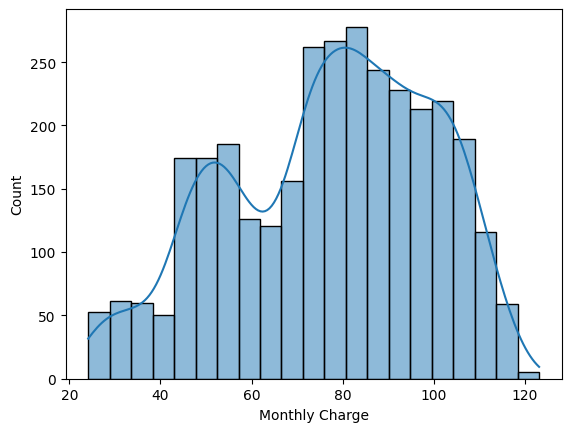

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


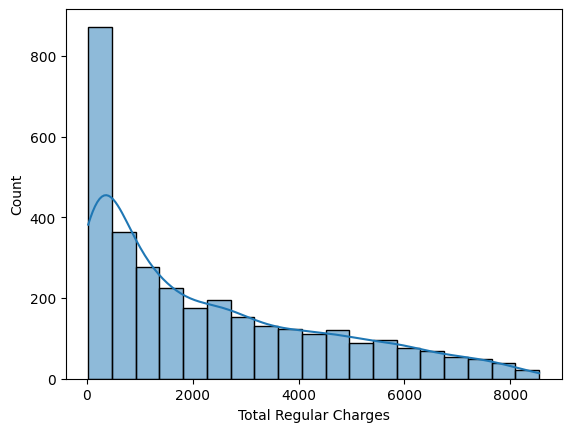

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


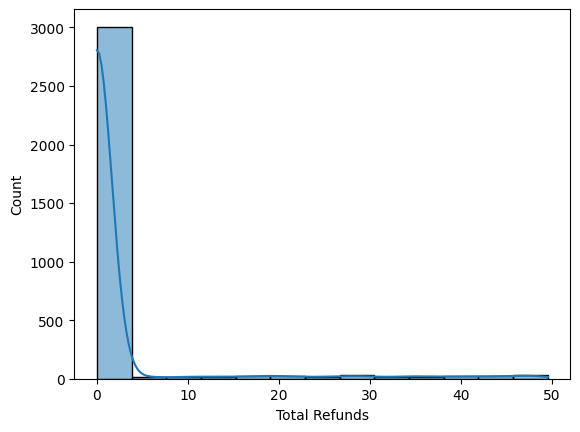

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


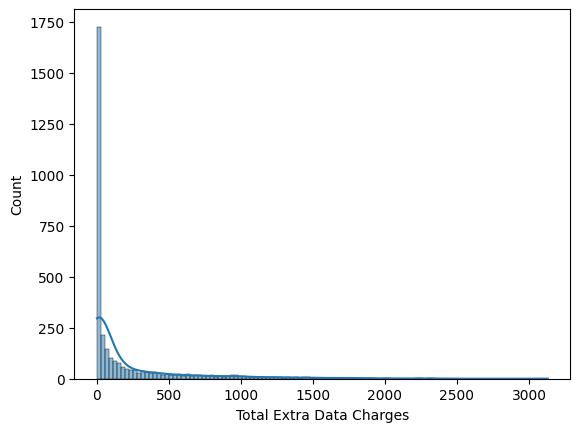

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


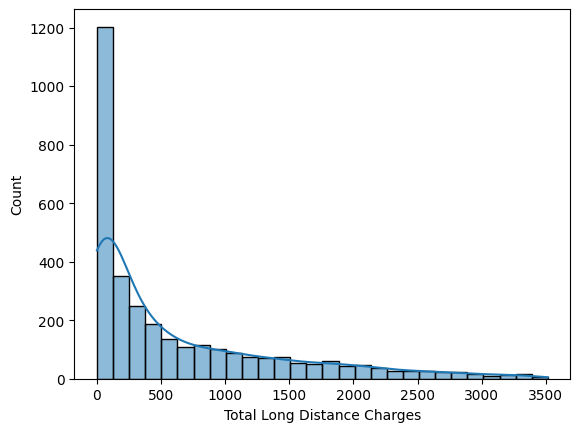

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


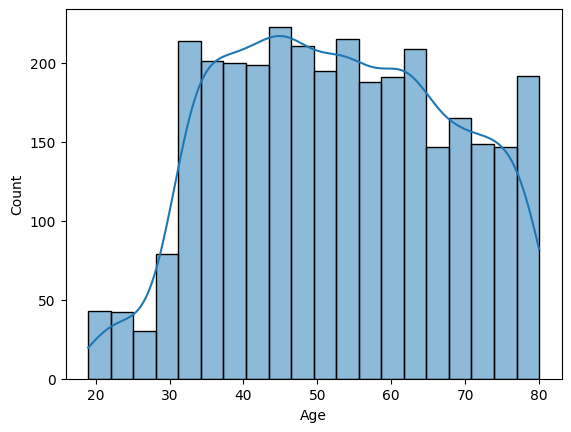

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


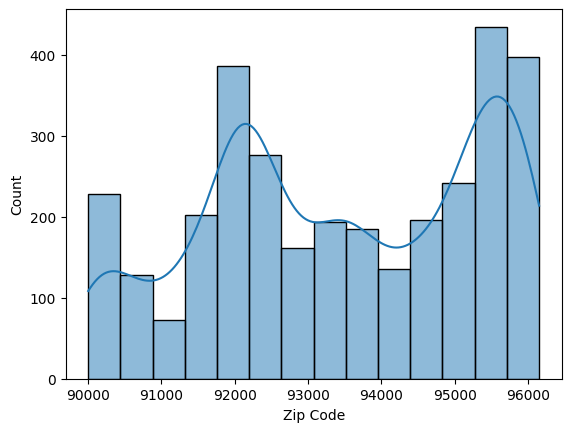

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


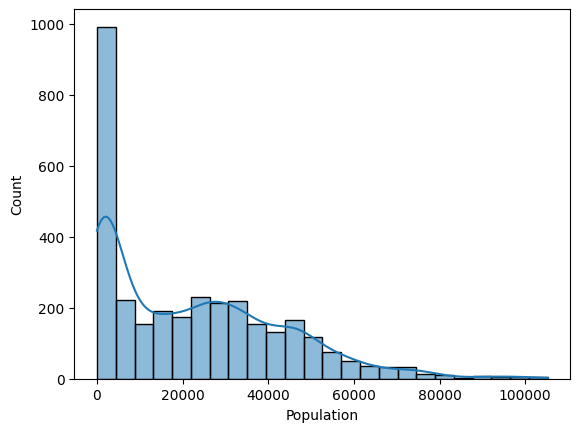

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


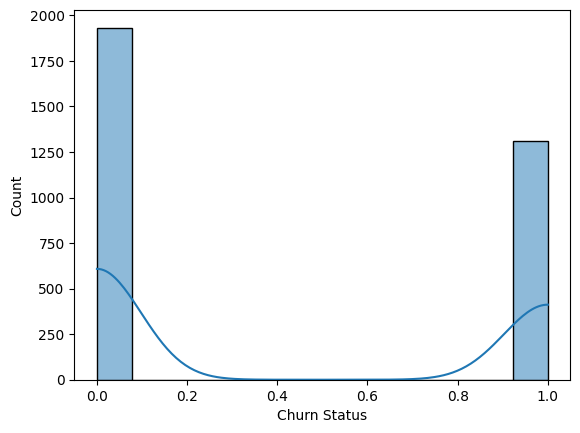

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


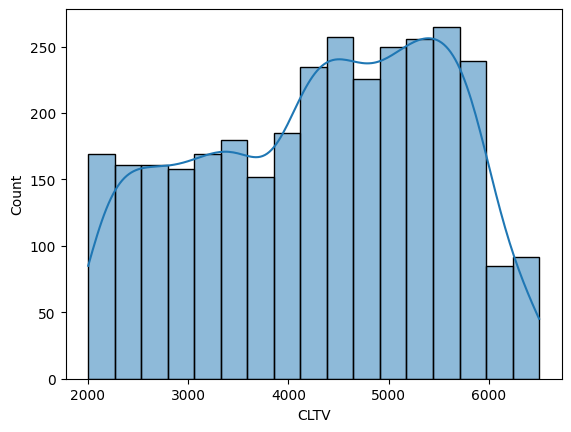

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


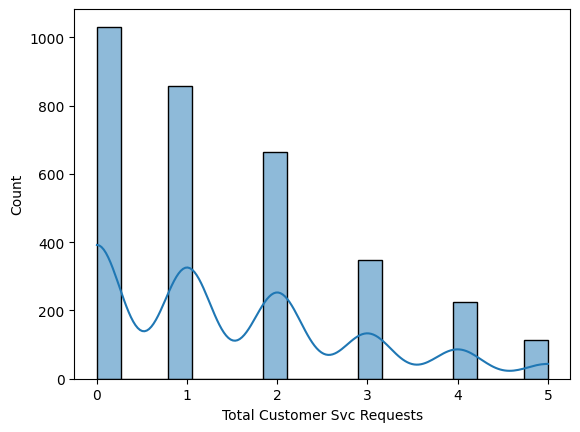

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


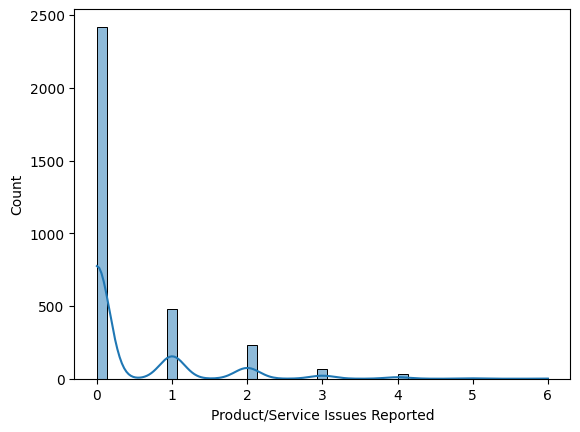

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


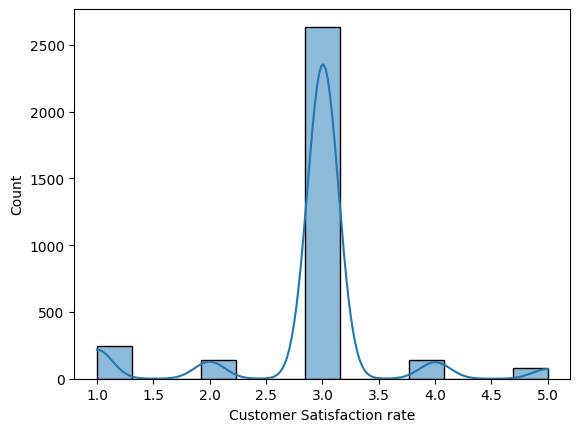

In [363]:

for col in churn_df.describe().columns:
    sns.histplot(churn_df[col],kde = True)
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

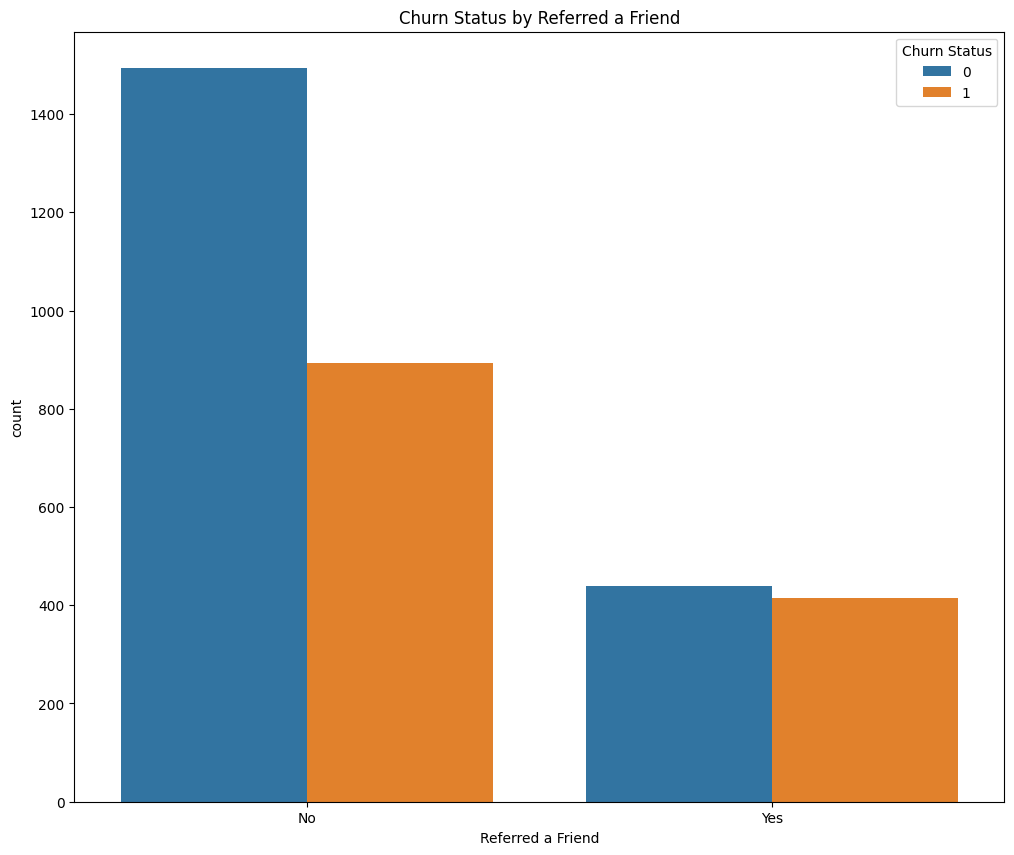

In [364]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Referred a Friend'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Referred a Friend')
plt.show()

The number of churners are those who are not refer a friend comapred to those who refer a friend

In [365]:
churn_df['Years'] = churn_df['Tenure in Months'] // 12

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='Years', ylabel='count'>

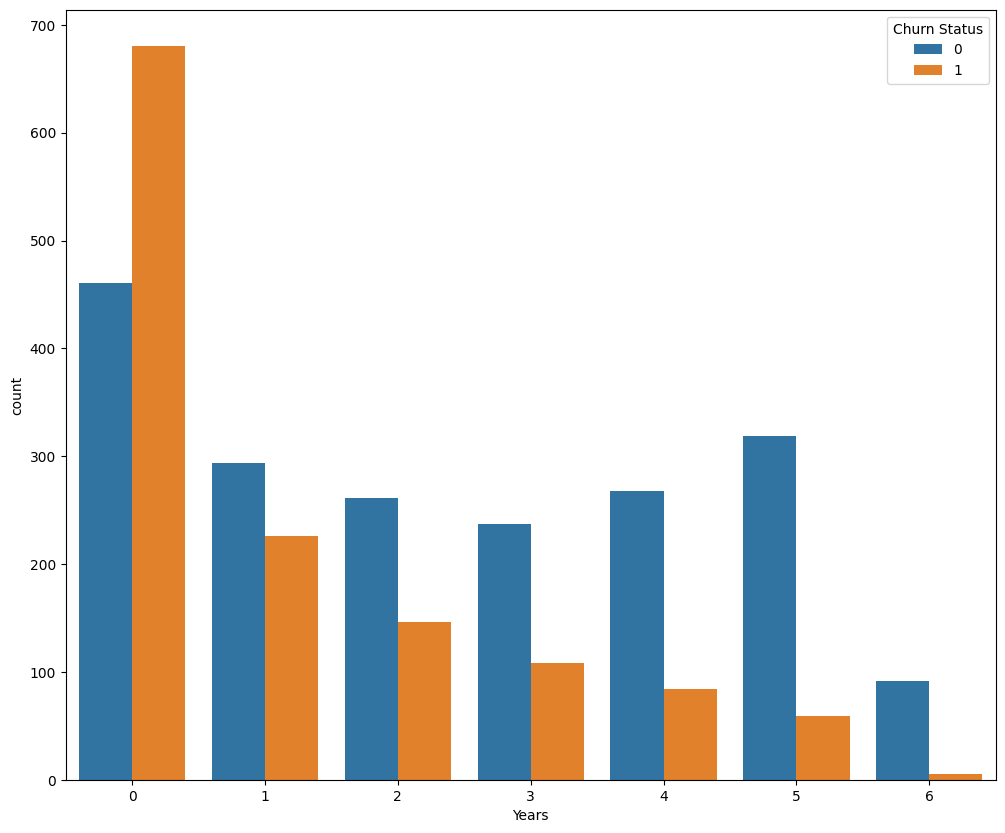

In [366]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Years'],hue = churn_df['Churn Status'])

From this graph we  get that the customers who are those who taken connection for  below 1 year 

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

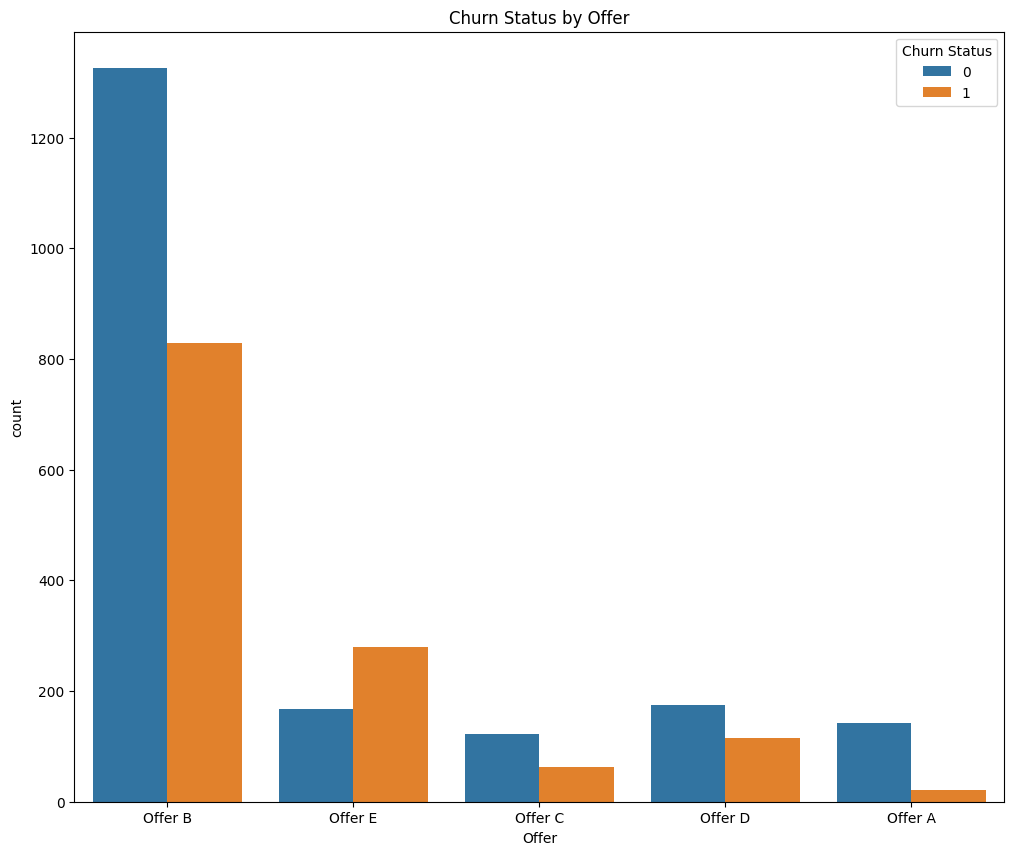

In [367]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Offer'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Offer')
plt.show()

The customers who gor Offer B are deoarting more than any other offers and those who got offer A is less 

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

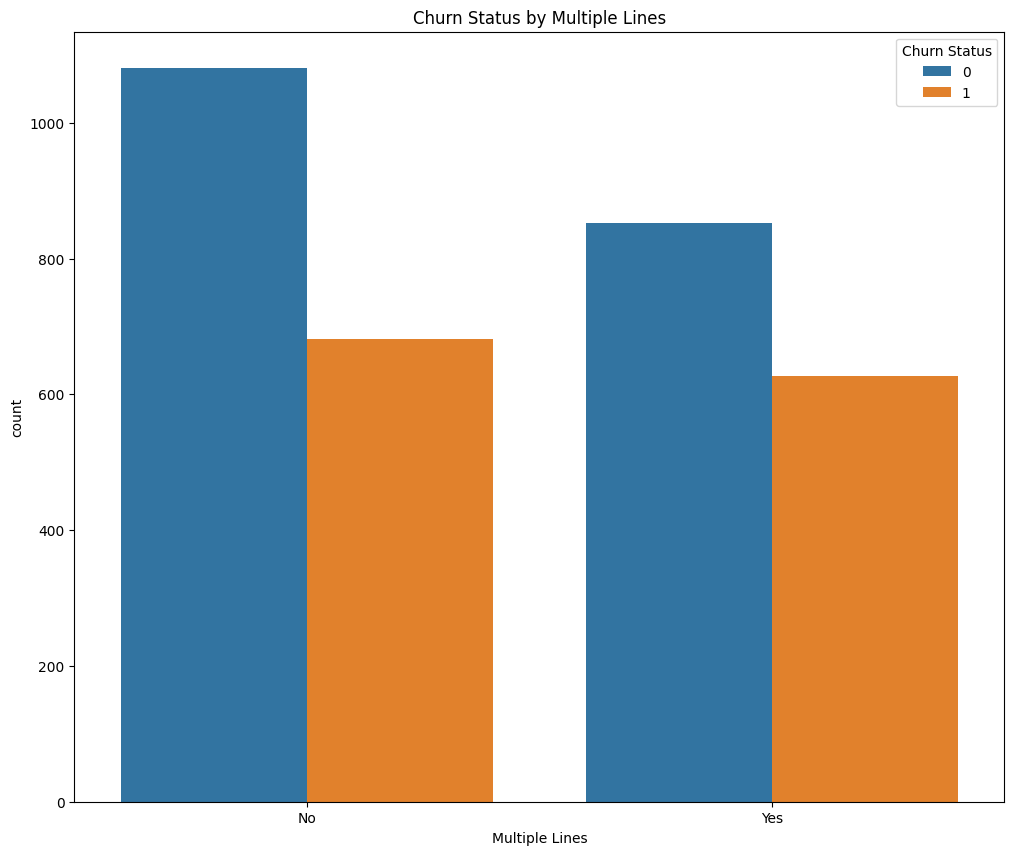

In [368]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Multiple Lines'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Multiple Lines')
plt.show()

Those who have no multiple line is likly to churn compared to those who have multiple line 

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

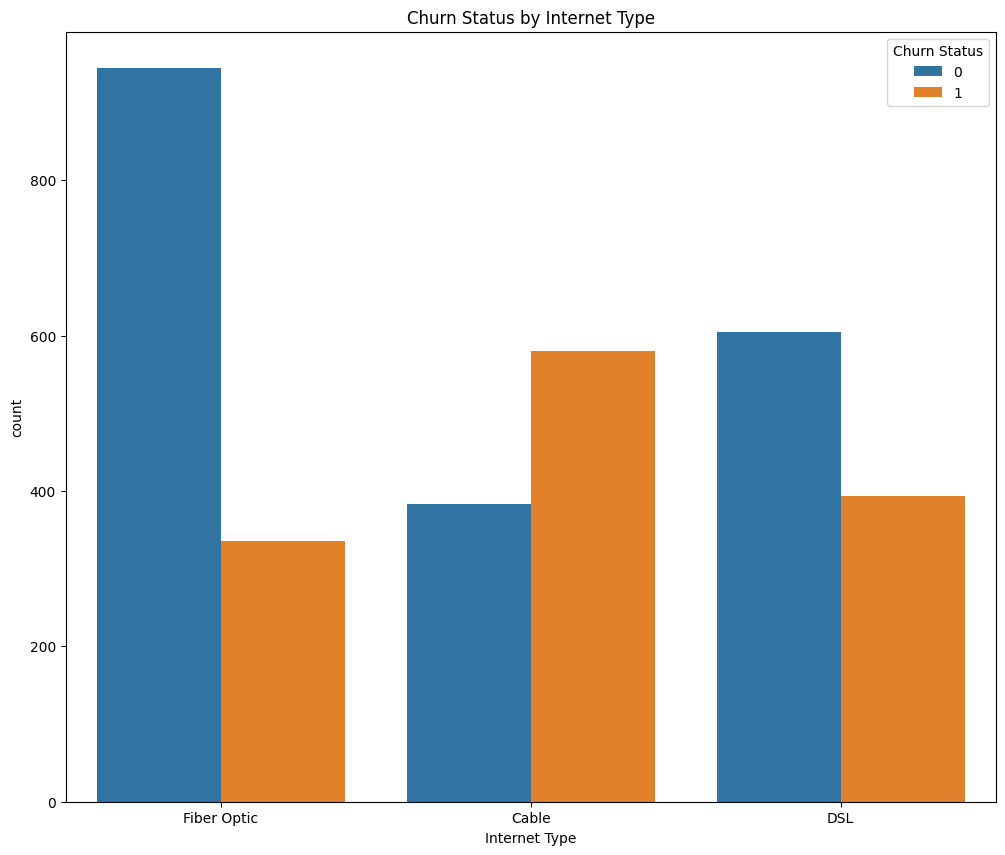

In [369]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Internet Type'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Internet Type')
plt.show()

The customers with cable connection is likly to churn compared to DSL and Fiber optic

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

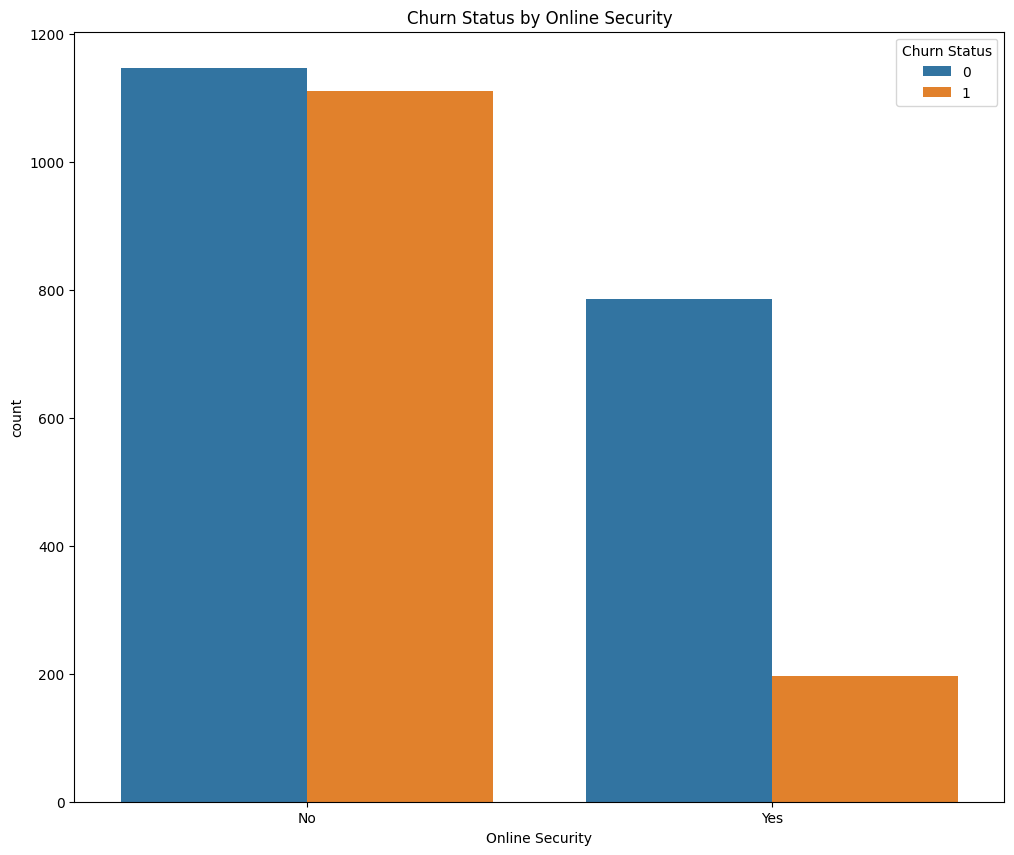

In [370]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Online Security'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Online Security')
plt.show()

Customer who have no online Security is likly to churn compared to those who have online security

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

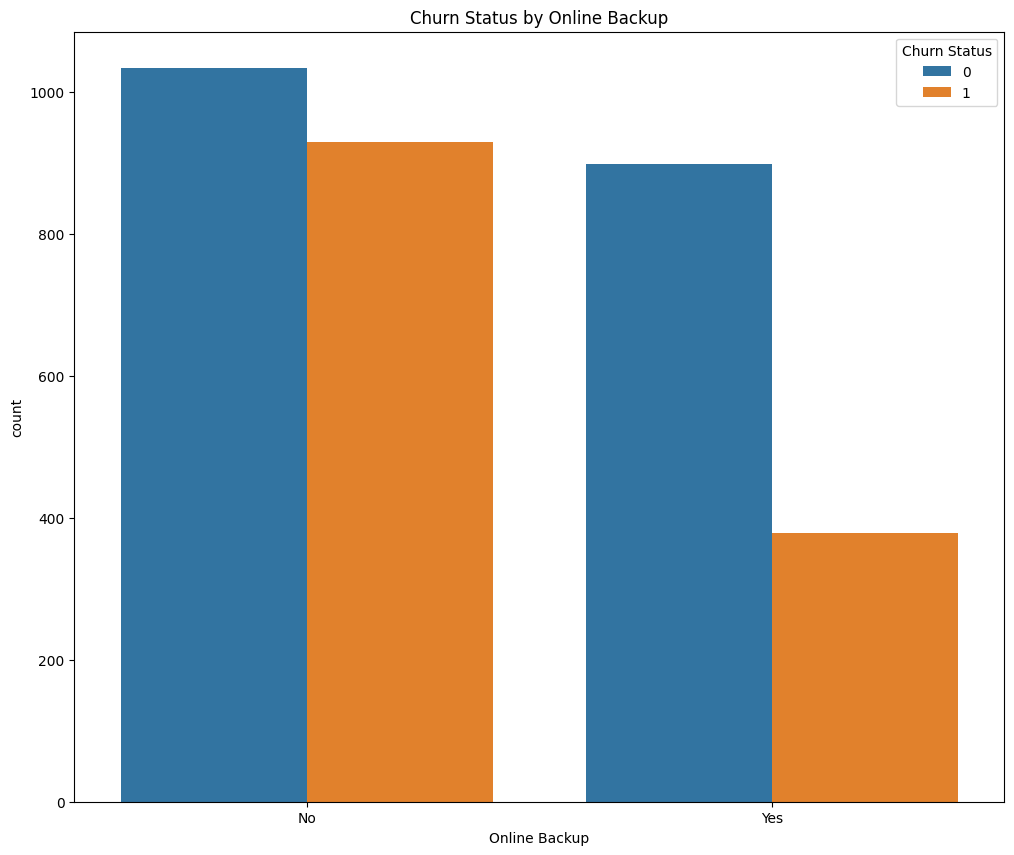

In [371]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Online Backup'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Online Backup')
plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

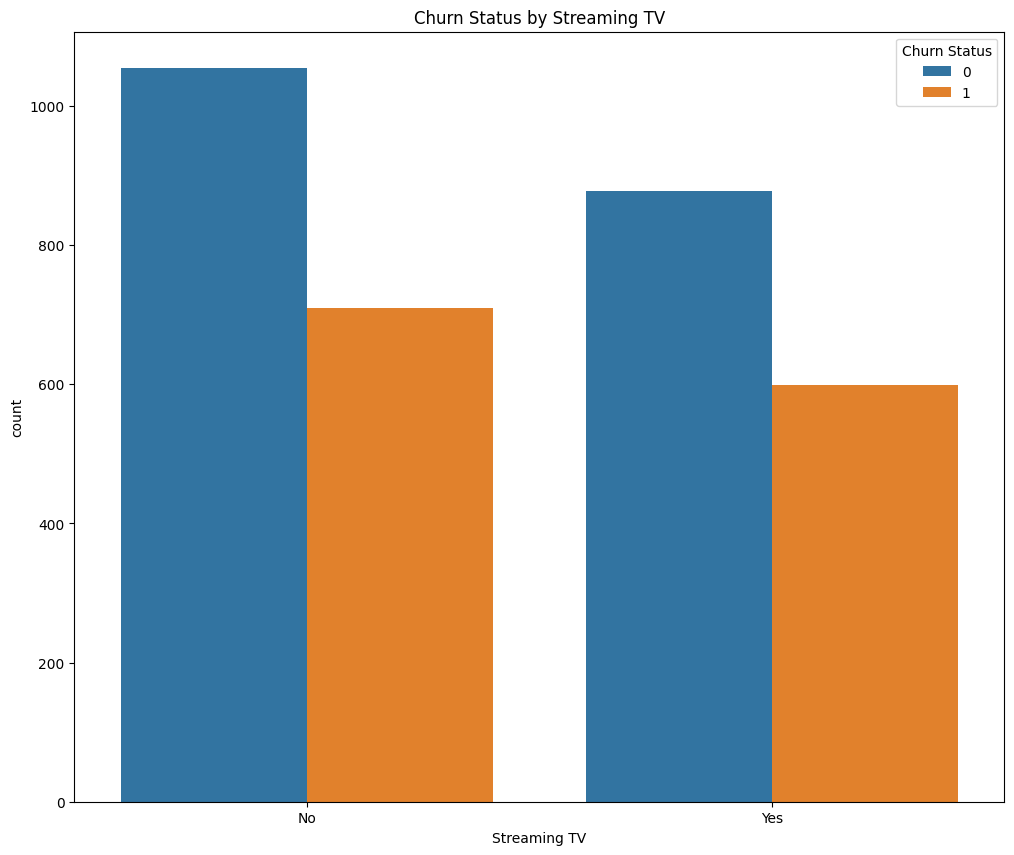

In [372]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Streaming TV'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Streaming TV')
plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

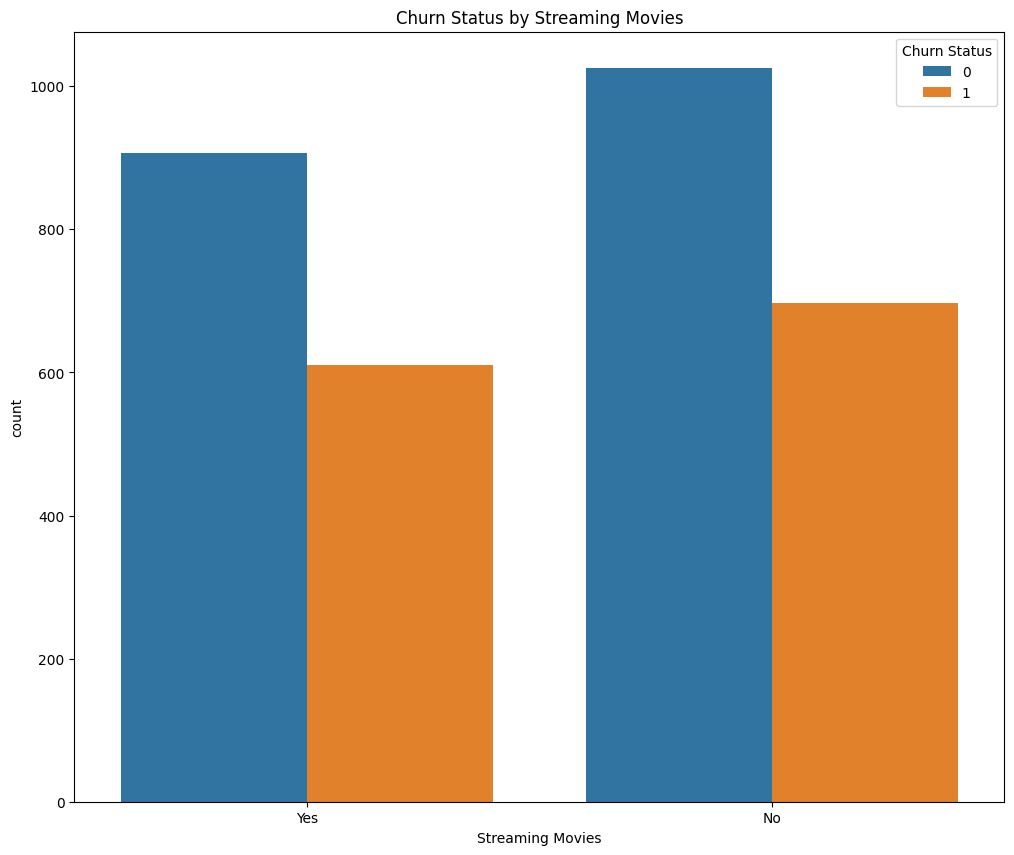

In [373]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Streaming Movies'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Streaming Movies')
plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

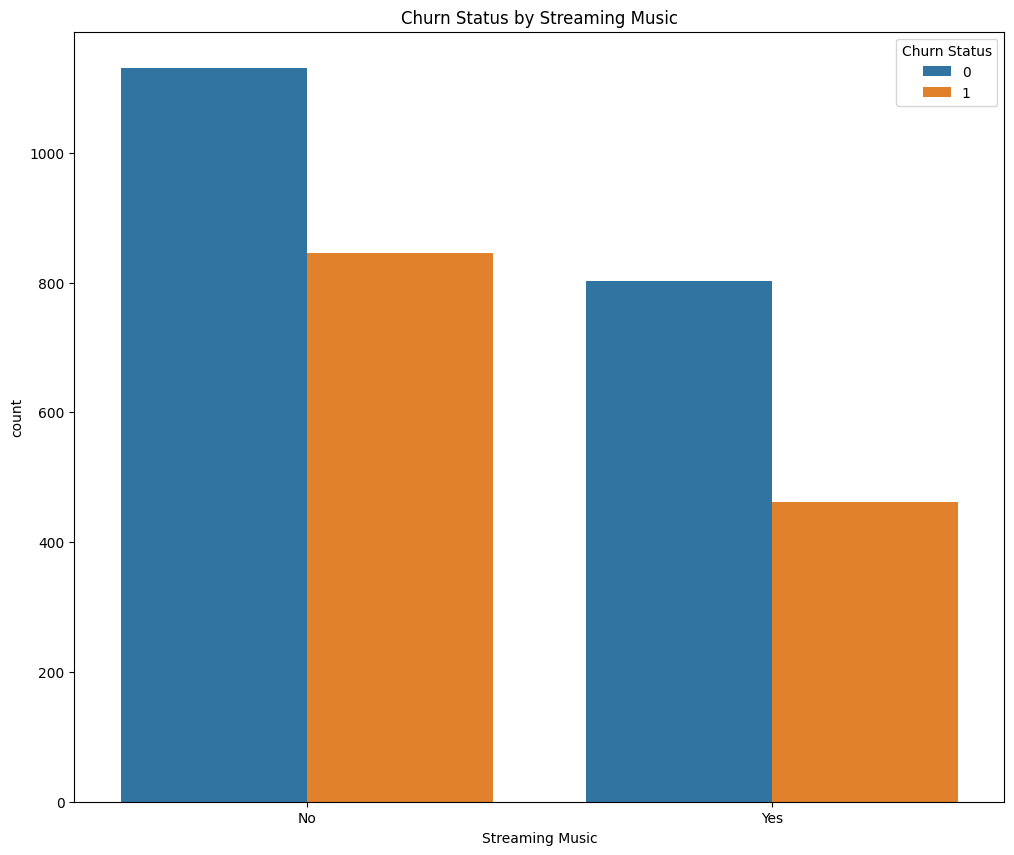

In [374]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Streaming Music'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Streaming Music')
plt.show()

The customers who do not stream music,movie ,Tv are likly to churn 

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

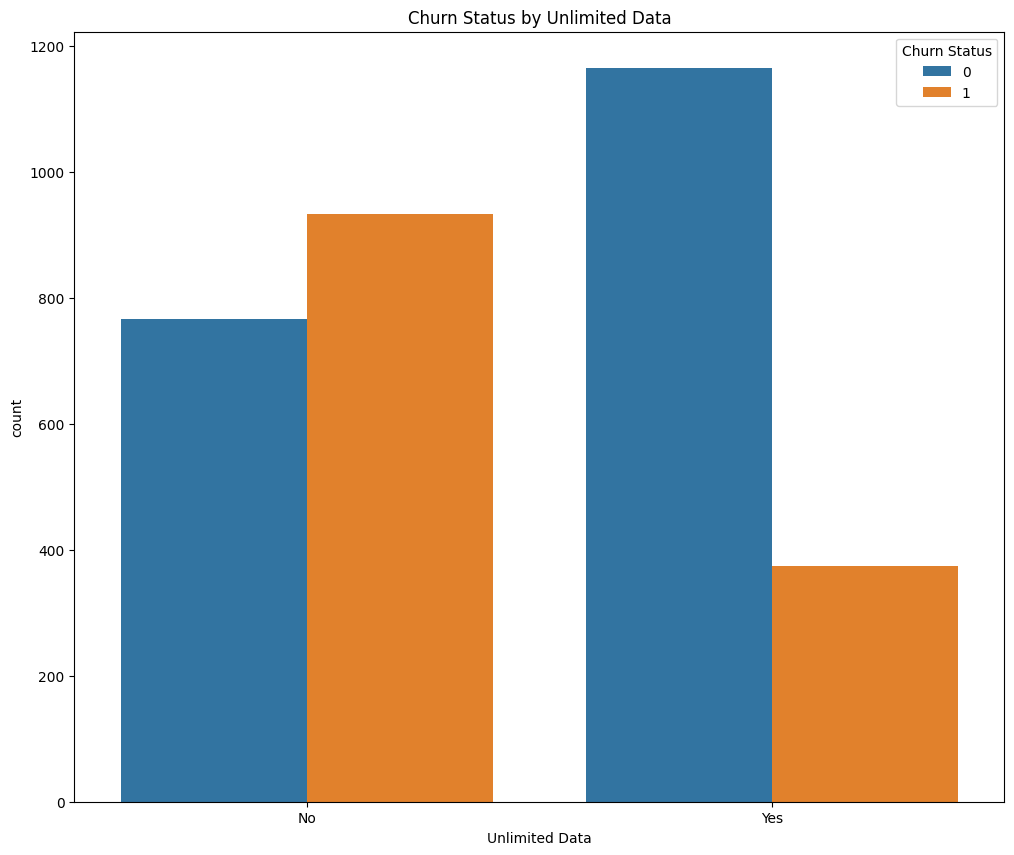

In [375]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Unlimited Data'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Unlimited Data')
plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

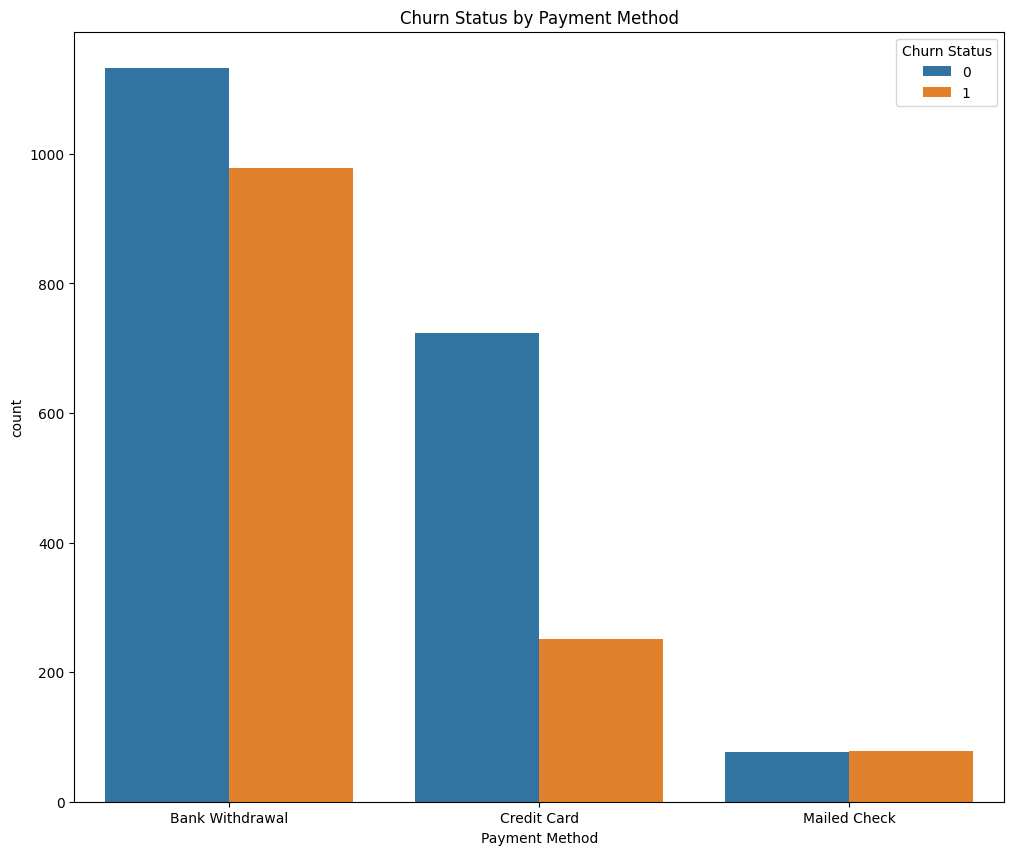

In [376]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Payment Method'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Payment Method')
plt.show()

Those customers who pament thorugh bank is likly to churn compared to other methods

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

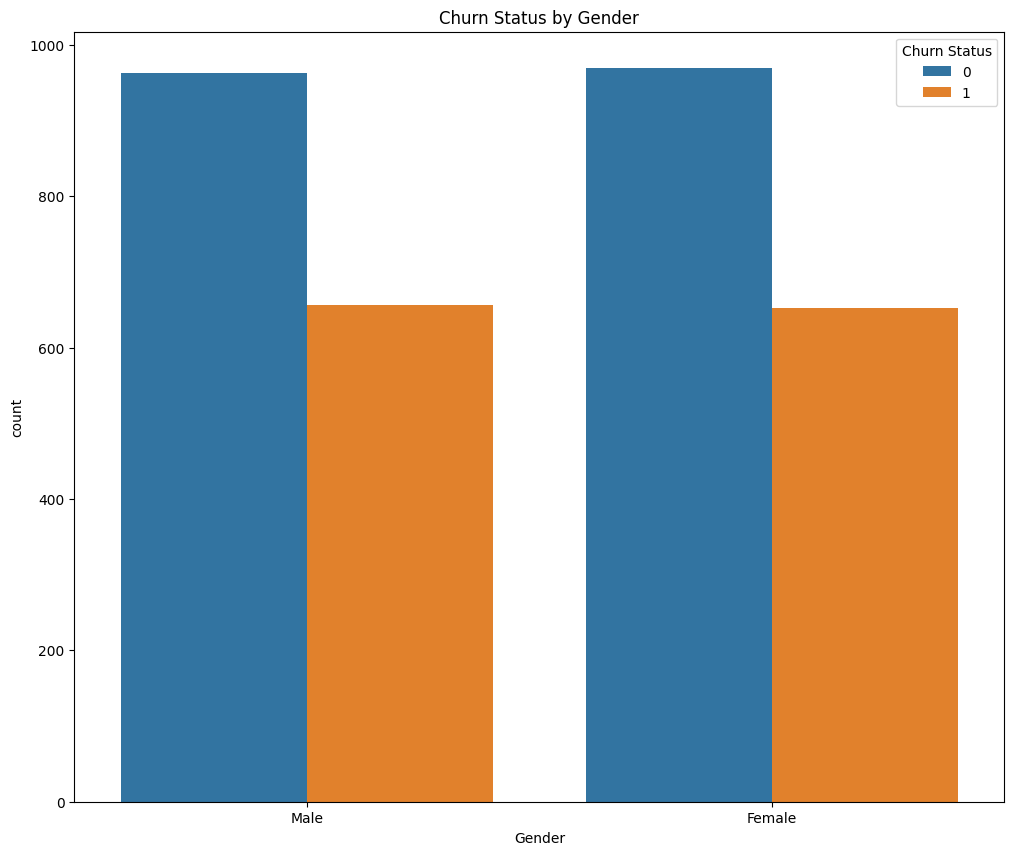

In [377]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Gender'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Gender')
plt.show()

Both Male and Female are likly to churn 

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

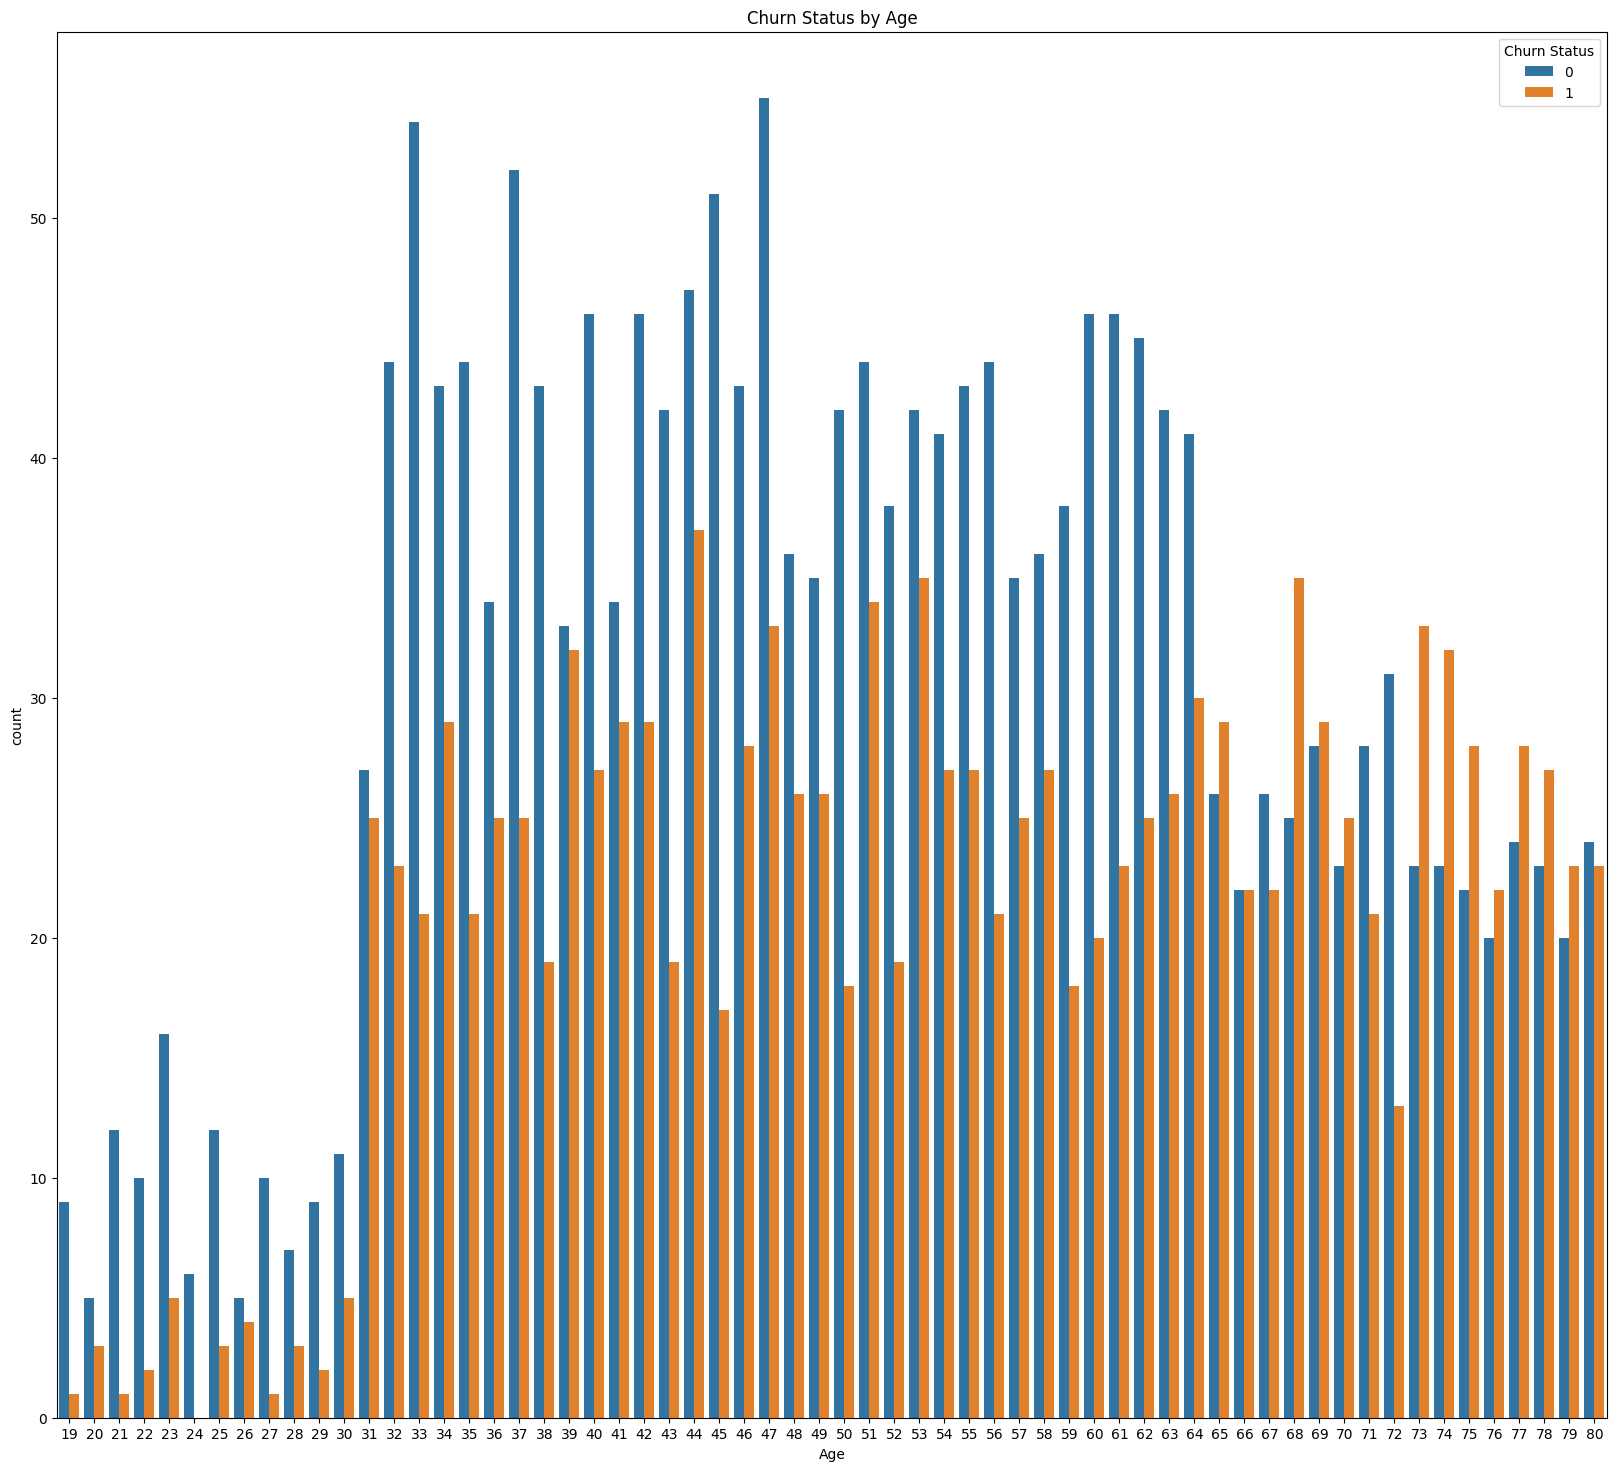

In [378]:
plt.figure(figsize= (20,18))
sns.countplot(x=churn_df['Age'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Age')
plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

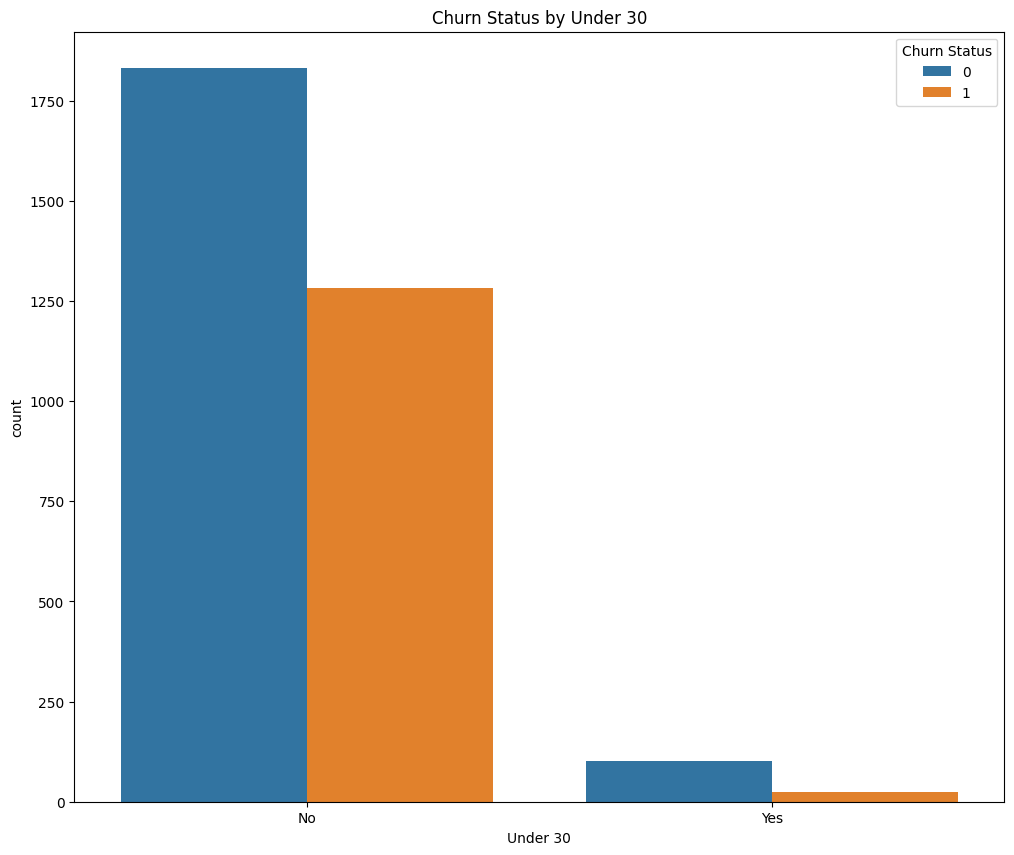

In [379]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Under 30'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Under 30')
plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

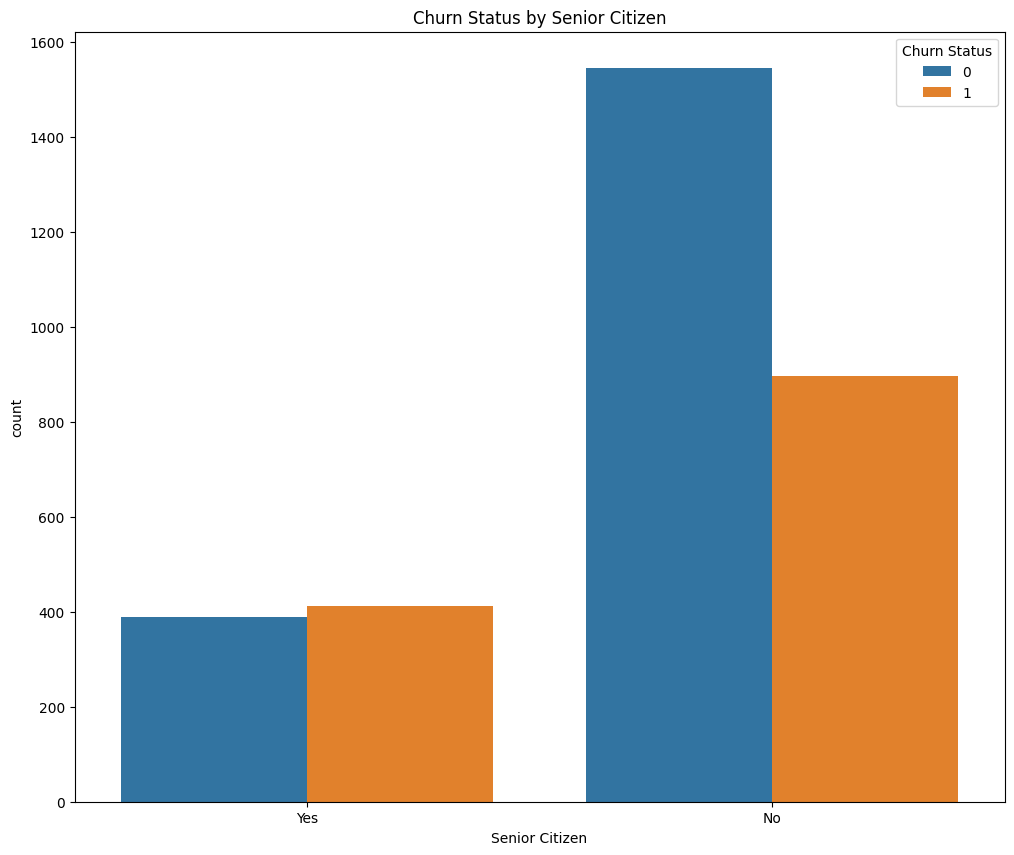

In [380]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Senior Citizen'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Senior Citizen')
plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

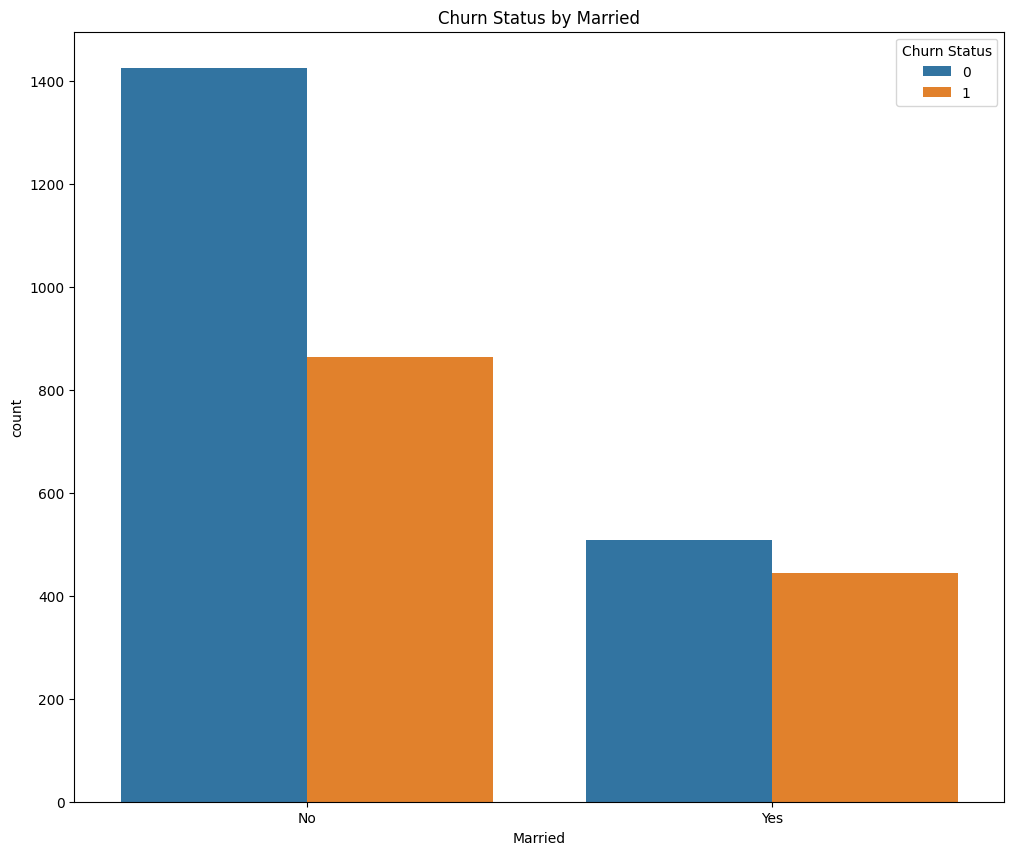

In [381]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Married'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Married')
plt.show()

From above these countplots The customer's age above 30 and those who are not senior citizen are likly to churn

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

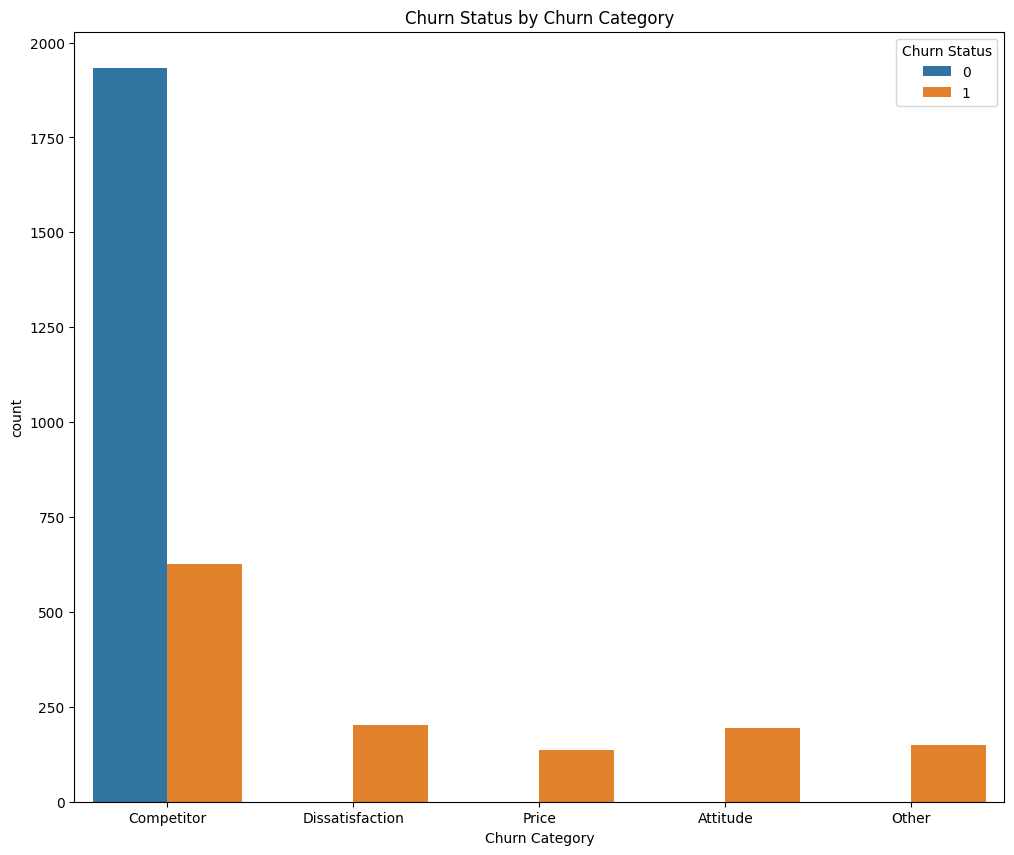

In [382]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Churn Category'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Churn Category')
plt.show()

The customers who had departed the company are more because of the competitor provde with more sutable connection

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

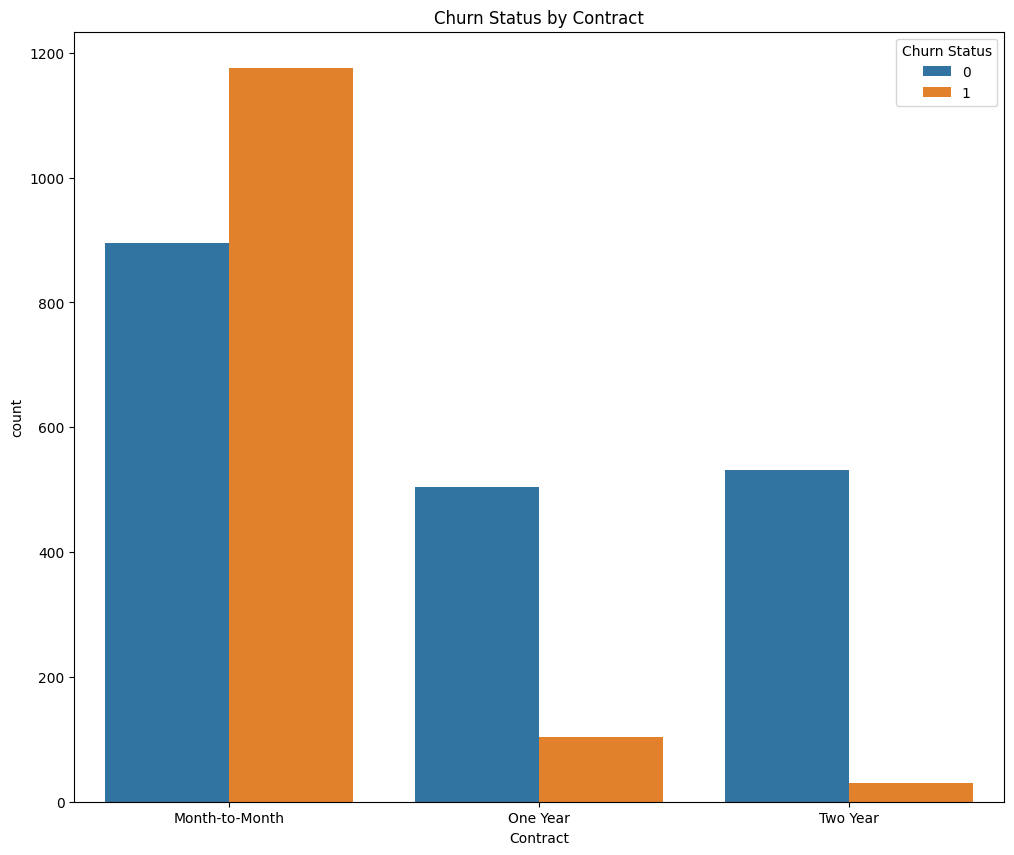

In [383]:
plt.figure(figsize= (12,10))
sns.countplot(x=churn_df['Contract'],hue = churn_df['Churn Status'])
plt.title('Churn Status by Contract')
plt.show()

customer who have month-to-month contract are likly to churn more compared to other contracts

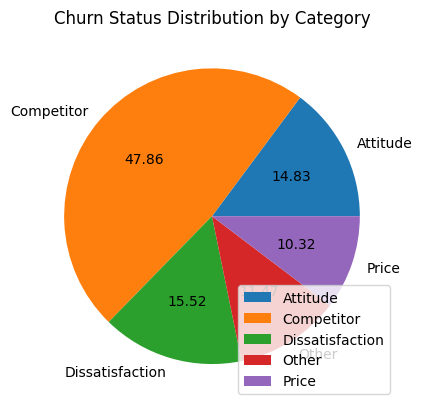

In [384]:
y = churn_df.groupby('Churn Category')['Churn Status'].sum()
x = y.index

plt.pie(y, labels=x, autopct='%.2f')
plt.legend(x, loc="lower right")
plt.title("Churn Status Distribution by Category")
plt.show()

# FeatureEngineering

## Label Encoding for the categorical variables

In [385]:
cat_colums

['Referred a Friend',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Gender',
 'Under 30',
 'Senior Citizen',
 'Married',
 'Dependents',
 'City',
 'Churn Category',
 'Churn Reason']

In [386]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in cat_colums:
    churn_df[column] = label_encoder.fit_transform(churn_df[column])

In [387]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3240 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  3240 non-null   int32  
 1   Number of Referrals                3240 non-null   int64  
 2   Tenure in Months                   3240 non-null   int64  
 3   Offer                              3240 non-null   int32  
 4   Phone Service                      3240 non-null   int32  
 5   Avg Monthly Long Distance Charges  3240 non-null   float64
 6   Multiple Lines                     3240 non-null   int32  
 7   Internet Service                   3240 non-null   int32  
 8   Internet Type                      3240 non-null   int32  
 9   Avg Monthly GB Download            3240 non-null   int64  
 10  Online Security                    3240 non-null   int32  
 11  Online Backup                      3240 non-null   int32  
 1

# Data Splitting


In [388]:
X= churn_df.drop('Churn Status',axis = 1)
y = churn_df['Churn Status'].values

In [389]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

# Model building and Evaluating

### Machine Learning
Machine learning enables computers to learn from
data and make decisions or predictions without being explicitly
programmed to do so.

## 1. Logistic Regression

Logistic regression is a statistical method used for binary classification problems, where the goal is to predict
the probability of an event occurring based on input features.

In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

LRaccuracy = accuracy_score(y_pred,y_test)
print("Logistic Regression Results:")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print('Random ForestClassifier accuracy is: {:.2f}%'.format(LRaccuracy*100))

Logistic Regression Results:
Confusion Matrix:
 [[298  75]
 [125 150]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75       373
           1       0.67      0.55      0.60       275

    accuracy                           0.69       648
   macro avg       0.69      0.67      0.67       648
weighted avg       0.69      0.69      0.69       648

Random ForestClassifier accuracy is: 69.14%


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. RandomForestClassifier

The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object. It is an ensemble tree-based learning algorithm.

In [391]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

random_forest = RandomForestClassifier(random_state=42)


random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

RFaccuracy = accuracy_score(y_test, y_pred)

print("Random Forest Results:")
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print('Random ForestClassifier accuracy is: {:.2f}%'.format(RFaccuracy*100))

Random Forest Results:
Confusion Matrix:
 [[369   4]
 [ 18 257]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       373
           1       0.98      0.93      0.96       275

    accuracy                           0.97       648
   macro avg       0.97      0.96      0.97       648
weighted avg       0.97      0.97      0.97       648

Random ForestClassifier accuracy is: 96.60%


## 3. DecisionTreeClassifier

A Decision Tree is a simple representation for classifying examples. It is a Supervised Machine Learning where the data is continuously split according to a certain parameter.

In [392]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

decision_tree = DecisionTreeClassifier(random_state=42)

decision_tree.fit(X_train,y_train)

y_pred = decision_tree.predict(X_test)


DTaccuracy = accuracy_score(y_test,y_pred)

print("Decision Tree Results:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))
print('Decision  TreeClassifier accuracy is: {:.2f}%'.format(DTaccuracy*100))

Decision Tree Results:
Confusion Matrix:
 [[362  11]
 [ 17 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       373
           1       0.96      0.94      0.95       275

    accuracy                           0.96       648
   macro avg       0.96      0.95      0.96       648
weighted avg       0.96      0.96      0.96       648

Decision  TreeClassifier accuracy is: 95.68%


## 4.  Support Vector Classifier

SVM or Support Vector Machine is a linear model for classification and regression problems. It can easily handle multiple continuous and categorical variables. 

In [393]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)


SVCaccuracy = accuracy_score(y_pred,y_test)

print("Support Vector Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))
print('Decision  TreeClassifier accuracy is: {:.2f}%'.format(SVCaccuracy*100))

Support Vector Classifier:
Confusion Matrix:
 [[161 212]
 [ 58 217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.43      0.54       373
           1       0.51      0.79      0.62       275

    accuracy                           0.58       648
   macro avg       0.62      0.61      0.58       648
weighted avg       0.64      0.58      0.57       648

Decision  TreeClassifier accuracy is: 58.33%


C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## 5.  k-nearest neighbors 

K-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [394]:

from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

KNaccuracy = accuracy_score(y_pred,y_test)
print(" k-nearest neighbors:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))
print('K Neighbours accuracy is: {:.2f}%'.format(KNaccuracy*100))

 k-nearest neighbors:
Confusion Matrix:
 [[298  75]
 [172 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.80      0.71       373
           1       0.58      0.37      0.45       275

    accuracy                           0.62       648
   macro avg       0.61      0.59      0.58       648
weighted avg       0.61      0.62      0.60       648

K Neighbours accuracy is: 61.88%


# Model Evaluation

In [399]:
# printing the classification model and its accuracy in a dataframe 
Model_evaluation = pd.DataFrame({'Model': ['Logistic Regression','Random Forest', 'Decision Tree', 'SVM','K Neighbors'],
                        'Accuracy': [LRaccuracy*100, RFaccuracy*100,DTaccuracy*100, SVCaccuracy *100,KNaccuracy*100]})


In [400]:
Model_evaluation

,Model,Accuracy
0,Logistic Regression,69.135802
1,Random Forest,96.604938
2,Decision Tree,95.679012
3,SVM,58.333333
4,K Neighbors,61.882716


From this we can understand that Random forest classifer and Decision tree classifer have the higest accuracy for predivcting the result